<a href="https://colab.research.google.com/github/tariqulq-cyber/Pemrosesan-teks-praktek/blob/main/Mini%20Project/Mini_projek_pemrosesan_text_5220411053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5220411053 MOUHAMMAD TARIQOUL QALAM

###***"Analisis Perbandingan Kepuasan Pengguna Dompet Digital: Siapa Aplikasi terbaik Antara DANA, OVO, dan GoPay berdasakan ulsan komentar"***

In [238]:
!pip install google-play-scraper

In [239]:
# Install Sastrawi for Indonesian text preprocessing
!pip install Sastrawi

In [240]:
# Scraping
from google_play_scraper import reviews, Sort

# Data Manipulation
import pandas as pd
import numpy as np

# Preprocessing Indonesia
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

###SCRAPING APLIKASI DANA

In [241]:
# ID Aplikasi DANA di Google Play Store
app_id = 'id.dana'

# Proses Scraping
result, continuation_token = reviews(
    app_id,
    lang='id',         # Bahasa ulasan (Indonesia)
    country='id',      # Negara (Indonesia)
    sort=Sort.NEWEST,  # Ambil ulasan terbaru
    count=2000,        # Jumlah ulasan yang ingin diambil
    filter_score_with=None # Mengambil semua rating (1-5)
)

# Mengubah hasil scraping menjadi DataFrame
df = pd.DataFrame(result)

# Mengambil kolom yang hanya dibutuhkan saja (Review dan Score)
# 'content' adalah ulasan, 'score' adalah rating bintangnya
df_dana = df[['content', 'score']]

# Mengganti nama kolom agar sesuai keinginan (Opsional)
df_dana.columns = ['Review', 'Rating']

# Menampilkan 5 data teratas
print("DANA Raw Reviews Head:")
display(df_dana.head())

# Mengecek jumlah data yang berhasil diambil
print(f"\nTotal data yang berhasil diambil: {len(df_dana)}")

# Menyimpan ke file CSV untuk tahap preprocessing nanti
df_dana.to_csv('dana_raw.csv', index=False)
print("Data berhasil disimpan ke dana_raw.csv")

DANA Raw Reviews Head:


Review  Rating
0                                          bagus ini       5
1                                              bagus       5
2  yang lain ada dana cicil saya gx ada padahal s...       1
3                                              bagus       5
4                      Dana cicil saya kenapa gaada?       5


Total data yang berhasil diambil: 2000
Data berhasil disimpan ke dana_raw.csv


###SCRAPING APLIKASI OVO

In [242]:
# ID Aplikasi OVO di Google Play Store
app_id = 'ovo.id'

# Proses Scraping
result, continuation_token = reviews(
    app_id,
    lang='id',         # Bahasa ulasan (Indonesia)
    country='id',      # Negara (Indonesia)
    sort=Sort.NEWEST,  # Ambil ulasan terbaru
    count=2000,        # Jumlah ulasan yang ingin diambil
    filter_score_with=None # Mengambil semua rating (1-5)
)

# Mengubah hasil scraping menjadi DataFrame
df = pd.DataFrame(result)

# Mengambil kolom yang hanya dibutuhkan saja (Review dan Score)
# 'content' adalah ulasan, 'score' adalah rating bintangnya
df_ovo = df[['content', 'score']]

# Mengganti nama kolom agar sesuai keinginan (Opsional)
df_ovo.columns = ['Review', 'Rating']

# Menampilkan 5 data teratas
print("OVO Raw Reviews Head:")
display(df_ovo.head())

# Mengecek jumlah data yang berhasil diambil
print(f"\nTotal data yang berhasil diambil: {len(df_ovo)}")

# Menyimpan ke file CSV untuk tahap preprocessing nanti
df_ovo.to_csv('ovo_raw.csv', index=False)
print("Data berhasil disimpan ke ovo_raw.csv")

OVO Raw Reviews Head:


Review  Rating
0                   mending ditutup, malah ngrepotin       1
1  ewallet terburuk yg pernah ku pakai . top up s...       1
2  Saya top up 400000 ovo di Indomaret tgl 23 sam...       1
3  ovo saya kok putih semua GK ada menu saldonya ...       2
4  Topup swap belum masuk .sudah beberapa kali hu...       1


Total data yang berhasil diambil: 2000
Data berhasil disimpan ke ovo_raw.csv


###SCRAPING APLIKASI GOPAY

In [243]:
# ID Aplikasi gopay di Google Play Store
app_id = 'com.gojek.gopay'

# Proses Scraping
result, continuation_token = reviews(
    app_id,
    lang='id',         # Bahasa ulasan (Indonesia)
    country='id',      # Negara (Indonesia)
    sort=Sort.NEWEST,  # Ambil ulasan terbaru
    count=2000,        # Jumlah ulasan yang ingin diambil
    filter_score_with=None # Mengambil semua rating (1-5)
)

# Mengubah hasil scraping menjadi DataFrame
df = pd.DataFrame(result)

# Mengambil kolom yang hanya dibutuhkan saja (Review dan Score)
# 'content' adalah ulasan, 'score' adalah rating bintangnya
df_gopay = df[['content', 'score']]

# Mengganti nama kolom agar sesuai keinginan (Opsional)
df_gopay.columns = ['Review', 'Rating']

# Menampilkan 5 data teratas
print("GoPay Raw Reviews Head:")
display(df_gopay.head())

# Mengecek jumlah data yang berhasil diambil
print(f"\nTotal data yang berhasil diambil: {len(df_gopay)}")

# Menyimpan ke file CSV untuk tahap preprocessing nanti
df_gopay.to_csv('gopay_raw.csv', index=False)
print("Data berhasil disimpan ke gopay_raw.csv")

GoPay Raw Reviews Head:


Review  Rating
0                                               nice       5
1                                                oke       5
2  ini aflikasi gopay gak jelas banget .. saya ud...       1
3                                            canggih       5
4                               semuanya jadi lancar       5


Total data yang berhasil diambil: 2000
Data berhasil disimpan ke gopay_raw.csv


###PREPROCESING DANA, OVO GOPAY

###Data Cleaning (Pembersihan Dasar) dan casefolding

Ini adalah tahap "sapu bersih" untuk membuang karakter yang tidak menambah informasi bagi mesin.

* Removal of HTML Tags: Jika datanya hasil web scraping, tag seperti < div > atau < a > harus dibuang.

* Removal of Special Characters: Menghapus emoji, simbol matematika, dan tanda baca.
* Hapus Non-ASCII: Menghilangkan emoji, simbol aneh, atau karakter selain alfabet.
* Removal of Numbers: Angka seringkali dihapus jika dianggap tidak relevan dengan konteks bahasa.
* Hapus Tanda Baca (Punctuation): Menghilangkan titik, koma, tanda seru, dll agar kata seperti "Bagus!" dan "Bagus" dianggap sama.
* Handling Whitespaces: Menghapus spasi ganda atau spasi di awal/akhir kalimat.



In [244]:
import re
import string

def clean_text(text):
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # 2. Remove non-ASCII characters (keep only ASCII characters)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # 3. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 5. Convert to lowercase
    text = text.lower()
    # 6. Remove extra whitespaces and leading/trailing whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("Fungsi pembersihan teks ‘clean_text’ telah didefinisikan.")

Fungsi pembersihan teks ‘clean_text’ telah didefinisikan.


In [245]:
from IPython.display import display

# Terapkan fungsi pembersihan pada kolom ‘Review’ dari setiap DataFrame
df_dana.loc[:, 'Review'] = df_dana['Review'].apply(clean_text)
df_ovo.loc[:, 'Review'] = df_ovo['Review'].apply(clean_text)
df_gopay.loc[:, 'Review'] = df_gopay['Review'].apply(clean_text)

# Tampilkan header kolom ‘Review’ yang telah dibersihkan
print("\nCleaned DANA Reviews Head:")
display(df_dana[['Review', 'Rating']].head())

print("\nCleaned OVO Reviews Head:")
display(df_ovo[['Review', 'Rating']].head())

print("\nCleaned GoPay Reviews Head:")
display(df_gopay[['Review', 'Rating']].head())

print("\nData yang telah berhasil di cesfolding dan dibersihkan untuk aplikasi DANA, OVO, dan GoPay.")


Cleaned DANA Reviews Head:


Review  Rating
0                                          bagus ini       5
1                                              bagus       5
2  yang lain ada dana cicil saya gx ada padahal s...       1
3                                              bagus       5
4                       dana cicil saya kenapa gaada       5


Cleaned OVO Reviews Head:


Review  Rating
0                    mending ditutup malah ngrepotin       1
1  ewallet terburuk yg pernah ku pakai top up sal...       1
2  saya top up ovo di indomaret tgl sampe sekaran...       1
3  ovo saya kok putih semua gk ada menu saldonya ...       2
4  topup swap belum masuk sudah beberapa kali hub...       1


Cleaned GoPay Reviews Head:


Review  Rating
0                                               nice       5
1                                                oke       5
2  ini aflikasi gopay gak jelas banget saya udah ...       1
3                                            canggih       5
4                               semuanya jadi lancar       5


Data yang telah berhasil di cesfolding dan dibersihkan untuk aplikasi DANA, OVO, dan GoPay.


###Normalization (normalisasi)

Di sinilah bahasa manusia yang berantakan diperbaiki.

* Slang Handling: Mengubah kata tidak baku menjadi baku (misal: "kalo" menjadi "kalau").
* Abbreviation Expansion: Memperpanjang singkatan (misal: "tks" menjadi "terima kasih").
* Spelling Correction: Memperbaiki typo (misal: "mkan" menjadi "makan").
* Handle Huruf Double: Mengubah "asikkkk" menjadi "asik".



### Muat Kamus Normalisasi

Memuat atau mendefinisikan kamus komprehensif untuk kata-kata gaul (slang), singkatan, dan kesalahan ketik (typo) umum dalam bahasa Indonesia beserta bentuk standarnya. Kamus ini akan digunakan untuk normalisasi.


In [246]:
normalization_dict = {
    "yg": "yang",
    "dgn": "dengan",
    "gak": "tidak",
    "gk": "tidak",
    "ga": "tidak",
    "tp": "tapi",
    "bgt": "banget",
    "bngt": "banget",
    "bnyk": "banyak",
    "udah": "sudah",
    "udh": "sudah",
    "jd": "jadi",
    "kpn": "kapan",
    "brp": "berapa",
    "utk": "untuk",
    "dr": "dari",
    "hrus": "harus",
    "bs": "bisa",
    "lg": "lagi",
    "aja": "saja",
    "cmn": "cuma",
    "byk": "banyak",
    "tks": "terima kasih",
    "mksh": "terima kasih",
    "sdh": "sudah",
    "gpp": "tidak apa apa",
    "klo": "kalau",
    "dlm": "dalam",
    "sm": "sama",
    "sbg": "sebagai",
    "jdwal": "jadwal",
    "bkn": "bukan",
    "krn": "karena",
    "prnh": "pernah",
    "sy": "saya",
    "tuh": "itu",
    "ni": "ini",
    "pake": "pakai",
    "udh": "sudah",
    "jg": "juga",
    "kyk": "kayak",
    "gmn": "bagaimana",
    "skrg": "sekarang",
    "bkin": "bikin",
    "jgn": "jangan",
    "cpt": "cepat",
    "bng": "bang",
    "msh": "masih",
    "bgtu": "begitu",
    "knp": "kenapa",
    "dpt": "dapat",
    "bgs": "bagus",
    "tf": "transfer",
    "mlh": "malah",
    "apk": "aplikasi",
    "asu": "anjing",
    "assu": "anjing",
    "aplokaai": "aplikasi",
    "pdhl": "padahal",
    "tak": "tidak",
    "hp" : "handphone",
    "no" : "nomor",
    "wa" : "whatsapp",
    "g" : "tidak",
    "tidakk": "tidak",
    "tidaklah": "tidak",
    "kurangtidak": "kurang tidak",
    "bisatidak": "bisa tidak",
    "lanjuttidak": "lanjut tidak",
    "Tidak":"tidak",
    "bida":"bisa",
    "ubahsaya":"ubah saya",
    "ajg":"anjing",
    "tidakbisa":"tidak bisa",
    "tidak-bisa":"tidak bisa",
    "tdk":"tidak",
    "sayaselalu":"saya selalu",
    "knpa" : "kenapa",
    "danan": "dana",
    "gahal":"gagal",
    "ngga" :"tidak",
    "gabisa" : "tidak bisa",
    "gaada" : "tidak ada",
    "knph" : "kenapa",
    "ajing": "anjing",
    "ajg": "anjing",
    "erormenyesal": "ero"

}

print("Kamus normalisasi (normalization_dict) telah berhasil dibuat.")

Kamus normalisasi (normalization_dict) telah berhasil dibuat.


In [247]:
from IPython.display import display
import re

def normalize_text(text):
    words = text.split()
    normalized_words = []
    for word in words:
        # Normalisasi menggunakan kamus
        normalized_word = normalization_dict.get(word, word)
        # Mengurangi urutan tiga atau lebih karakter identik berturut-turut menjadi satu karakter.
        normalized_word = re.sub(r'(.)\1{2,}', r'\1', normalized_word)
        normalized_words.append(normalized_word)
    return ' '.join(normalized_words)

# Terapkan fungsi normalisasi pada kolom ‘Review’ dari setiap DataFrame
df_dana.loc[:, 'Review'] = df_dana['Review'].apply(normalize_text)
df_ovo.loc[:, 'Review'] = df_ovo['Review'].apply(normalize_text)
df_gopay.loc[:, 'Review'] = df_gopay['Review'].apply(normalize_text)

# Tampilkan lima baris pertama dari kolom ‘Review’ dan ‘Rating’ untuk setiap DataFrame
print("\nNormalized DANA Reviews Head:")
display(df_dana[['Review', 'Rating']].head())

print("\nNormalized OVO Reviews Head:")
display(df_ovo[['Review', 'Rating']].head())

print("\nNormalized GoPay Reviews Head:")
display(df_gopay[['Review', 'Rating']].head())

print("\nNormalisasi teks ulasan telah berhasil diterapkan untuk aplikasi DANA, OVO, dan GoPay.")


Normalized DANA Reviews Head:


Review  Rating
0                                          bagus ini       5
1                                              bagus       5
2  yang lain ada dana cicil saya gx ada padahal s...       1
3                                              bagus       5
4                   dana cicil saya kenapa tidak ada       5


Normalized OVO Reviews Head:


Review  Rating
0                    mending ditutup malah ngrepotin       1
1  ewallet terburuk yang pernah ku pakai top up s...       1
2  saya top up ovo di indomaret tgl sampe sekaran...       1
3  ovo saya kok putih semua tidak ada menu saldon...       2
4  topup swap belum masuk sudah beberapa kali hub...       1


Normalized GoPay Reviews Head:


Review  Rating
0                                               nice       5
1                                                oke       5
2  ini aflikasi gopay tidak jelas banget saya sud...       1
3                                            canggih       5
4                               semuanya jadi lancar       5


Normalisasi teks ulasan telah berhasil diterapkan untuk aplikasi DANA, OVO, dan GoPay.


### Tokenization
Proses memecah paragraf atau kalimat menjadi potongan-potongan kecil yang disebut Token.

*	Word Tokenization: Memecah kalimat menjadi kata-kata tunggal.
*	Sentence Tokenization: Memecah paragraf menjadi kalimat-kalimat.




### Impor NLTK dan Unduh Data Punkt_tab

Mengimpor pustaka NLTK dan mengunduh data 'punkt' yang diperlukan untuk tokenisasi kata dan kalimat.


In [248]:
import nltk
nltk.download('punkt_tab')

print("NLTK library imported and 'punkt' tokenizer data downloaded.")

NLTK library imported and 'punkt' tokenizer data downloaded.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [249]:
from IPython.display import display
from nltk.tokenize import word_tokenize, sent_tokenize

# tentukan fungsi tokenisasi kata
def tokenize_words(text):
    return word_tokenize(text)

# Tentukan fungsi tokenisasi kalimat
def tokenize_sentences(text):
    return sent_tokenize(text)

# Terapkan tokenisasi kata
df_dana.loc[:, 'Review_Tokens_Kata'] = df_dana['Review'].apply(tokenize_words)
df_ovo.loc[:, 'Review_Tokens_Kata'] = df_ovo['Review'].apply(tokenize_words)
df_gopay.loc[:, 'Review_Tokens_Kata'] = df_gopay['Review'].apply(tokenize_words)

# terapkan tokenisasi kalimat
df_dana.loc[:, 'Review_Tokens_Kalimat'] = df_dana['Review'].apply(tokenize_sentences)
df_ovo.loc[:, 'Review_Tokens_Kalimat'] = df_ovo['Review'].apply(tokenize_sentences)
df_gopay.loc[:, 'Review_Tokens_Kalimat'] = df_gopay['Review'].apply(tokenize_sentences)

# Tampilkan lima baris pertama dengan kolom-kolom baru
print("\nDANA Reviews with Tokens:")
display(df_dana[['Review', 'Rating', 'Review_Tokens_Kata', 'Review_Tokens_Kalimat']].head())

print("\nOVO Reviews with Tokens:")
display(df_ovo[['Review', 'Rating', 'Review_Tokens_Kata', 'Review_Tokens_Kalimat']].head())

print("\nGoPay Reviews with Tokens:")
display(df_gopay[['Review', 'Rating', 'Review_Tokens_Kata', 'Review_Tokens_Kalimat']].head())

print("\nTokenisasi telah diterapkan dengan sukses.")


DANA Reviews with Tokens:


/tmp/ipython-input-2833891635.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gopay.loc[:, 'Review_Tokens_Kata'] = df_gopay['Review'].apply(tokenize_words)
/tmp/ipython-input-2833891635.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gopay.loc[:, 'Review_Tokens_Kalimat'] = df_gopay['Review'].apply(tokenize_sentences)


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                                  Review_Tokens_Kata  \
0                                       [bagus, ini]   
1                                            [bagus]   
2  [yang, lain, ada, dana, cicil, saya, gx, ada, ...   
3                                            [bagus]   
4            [dana, cicil, saya, kenapa, tidak, ada]   

                               Review_Tokens_Kalimat  
0                                        [bagus ini]  
1                                            [bagus]  
2  [yang lain ada dana cicil saya gx ada padahal ...  
3                                            [bagus]  
4                 [dana cicil saya kenapa tidak ada]


OVO Reviews with Tokens:


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata  \
0               [mending, ditutup, malah, ngrepotin]   
1  [ewallet, terburuk, yang, pernah, ku, pakai, t...   
2  [saya, top, up, ovo, di, indomaret, tgl, sampe...   
3  [ovo, saya, kok, putih, semua, tidak, ada, men...   
4  [topup, swap, belum, masuk, sudah, beberapa, k...   

                               Review_Tokens_Kalimat  
0                  [mending ditutup malah ngrepotin]  
1  [ewallet terburuk yang pernah ku pakai top up ...  
2  [saya top up ovo di indomaret tgl sampe sekara...  
3  [ovo saya kok putih semua tidak ada menu saldo...  
4  [topup swap belum masuk sudah beberapa kali hu...


GoPay Reviews with Tokens:


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata  \
0                                             [nice]   
1                                              [oke]   
2  [ini, aflikasi, gopay, tidak, jelas, banget, s...   
3                                          [canggih]   
4                           [semuanya, jadi, lancar]   

                               Review_Tokens_Kalimat  
0                                             [nice]  
1                                              [oke]  
2  [ini aflikasi gopay tidak jelas banget saya su...  
3                                          [canggih]  
4                             [semuanya jadi lancar]


Tokenisasi telah diterapkan dengan sukses.


### Filtering (Hapus Kata Kurang dari 3 Huruf)

Langkah ini bertujuan untuk menghapus kata-kata pendek (kurang dari 3 huruf) yang seringkali merupakan *stop words* atau tidak memiliki makna signifikan dalam analisis teks.

In [250]:
from IPython.display import display

def filter_short_words(tokens):
    # 1. Tentukan daftar kata pendek yang HARUS SELAMAT (Whitelist)
    whitelist = {'otp','pin','bug',}

    # 2. Proses pembersihan: Simpan kata jika (panjangnya > 3) ATAU (ada di dalam whitelist)
    return [w for w in tokens if len(w) > 3 or w in whitelist]

# Terapkan fungsi filter pada kolom 'Review_Tokens_Kata'
df_dana.loc[:, 'Review_Tokens_Kata'] = df_dana['Review_Tokens_Kata'].apply(filter_short_words)
df_ovo.loc[:, 'Review_Tokens_Kata'] = df_ovo['Review_Tokens_Kata'].apply(filter_short_words)
df_gopay.loc[:, 'Review_Tokens_Kata'] = df_gopay['Review_Tokens_Kata'].apply(filter_short_words)

# Tampilkan lima baris pertama dengan kolom yang telah difilter
print("\nDANA Reviews after filtering short words with whitelist:")
display(df_dana[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nOVO Reviews after filtering short words with whitelist:")
display(df_ovo[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nGoPay Reviews after filtering short words with whitelist:")
display(df_gopay[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nFiltering kata-kata pendek dengan whitelist berhasil diterapkan.")



DANA Reviews after filtering short words with whitelist:


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                                  Review_Tokens_Kata  
0                                            [bagus]  
1                                            [bagus]  
2  [yang, lain, dana, cicil, saya, padahal, saya,...  
3                                            [bagus]  
4                 [dana, cicil, saya, kenapa, tidak]


OVO Reviews after filtering short words with whitelist:


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata  
0               [mending, ditutup, malah, ngrepotin]  
1  [ewallet, terburuk, yang, pernah, pakai, saldo...  
2  [saya, indomaret, sampe, sekarang, masuk, kata...  
3  [saya, putih, semua, tidak, menu, saldonya, tr...  
4  [topup, swap, belum, masuk, sudah, beberapa, k...


GoPay Reviews after filtering short words with whitelist:


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata  
0                                             [nice]  
1                                                 []  
2  [aflikasi, gopay, tidak, jelas, banget, saya, ...  
3                                          [canggih]  
4                           [semuanya, jadi, lancar]


Filtering kata-kata pendek dengan whitelist berhasil diterapkan.


### Stopwords Removal

Menghapus kata-kata yang frekuensinya tinggi tapi tidak memiliki makna unik atau penting. Contoh: "yang", "di", "dari", "adalah".

In [251]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from IPython.display import display

# Buat stopword remover
factory = StopWordRemoverFactory()

# Dapatkan daftar stopword bawaan dari Sastrawi
default_stopwords = factory.get_stop_words()

# Tambahkan custom stopwords
custom_stopwords = [
    'gopay','ovo','dana',
]

# Gabungkan default stopwords dengan custom stopwords
all_stopwords = set(default_stopwords).union(set(custom_stopwords))

# --- Bagian Kritis: Daftar kata yang HARUS dipertahankan ---
# Tambahkan kata-kata penting di sini. Pastikan sesuai dengan whitelist di filter_short_words
words_to_keep = {'otp','pin','bug','duit','uang','bayar','transfer','tidak','jangan','bisa','belum'}

# Hapus kata-kata yang ingin dipertahankan dari daftar semua stopword
all_stopwords = all_stopwords - words_to_keep
# ----------------------------------------------------------

def remove_stopwords_with_exceptions(tokens):
    filtered_tokens = []
    for word in tokens:
        # Cek apakah kata tidak ada dalam daftar stopword YANG SUDAH DIMODIFIKASI
        if word.lower() not in all_stopwords:
            filtered_tokens.append(word)
    return filtered_tokens

print("Daftar stopword telah diperbarui untuk mempertahankan kata-kata penting.\n")

# Terapkan fungsi penghapusan stopword yang baru pada kolom 'Review_Tokens_Kata'
df_dana.loc[:, 'Review_Tokens_Kata'] = df_dana['Review_Tokens_Kata'].apply(remove_stopwords_with_exceptions)
df_ovo.loc[:, 'Review_Tokens_Kata'] = df_ovo['Review_Tokens_Kata'].apply(remove_stopwords_with_exceptions)
df_gopay.loc[:, 'Review_Tokens_Kata'] = df_gopay['Review_Tokens_Kata'].apply(remove_stopwords_with_exceptions)

# Tampilkan lima baris pertama dengan kolom yang telah difilter
print("DANA Reviews after stopword removal (with exceptions):")
display(df_dana[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nOVO Reviews after stopword removal (with exceptions):")
display(df_ovo[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nGoPay Reviews after stopword removal (with exceptions):")
display(df_gopay[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nPenghapusan stopword dengan pengecualian berhasil diterapkan.")

Daftar stopword telah diperbarui untuk mempertahankan kata-kata penting.

DANA Reviews after stopword removal (with exceptions):


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                                 Review_Tokens_Kata  
0                                           [bagus]  
1                                           [bagus]  
2  [cicil, padahal, sering, bertransaksi, aplikasi]  
3                                           [bagus]  
4                                    [cicil, tidak]


OVO Reviews after stopword removal (with exceptions):


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata  
0               [mending, ditutup, malah, ngrepotin]  
1  [ewallet, terburuk, pernah, pakai, saldo, bert...  
2  [indomaret, sampe, sekarang, masuk, kata, piha...  
3  [putih, semua, tidak, menu, saldonya, transper...  
4  [topup, swap, belum, masuk, beberapa, kali, hu...


GoPay Reviews after stopword removal (with exceptions):


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata  
0                                             [nice]  
1                                                 []  
2  [aflikasi, tidak, jelas, banget, berlangganan,...  
3                                          [canggih]  
4                           [semuanya, jadi, lancar]


Penghapusan stopword dengan pengecualian berhasil diterapkan.


### Stemming

Tujuannya adalah mencari kata dasar.
*   **Stemming**: Memotong awalan dan akhiran secara kasar (misal: "berlari" menjadi "lari"). Ini lebih cepat tapi kurang akurat secara linguistik.

In [252]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from IPython.display import display

# Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_words(tokens):
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Terapkan fungsi stemming pada kolom 'Review_Tokens_Kata'
df_dana.loc[:, 'Review_Tokens_Kata'] = df_dana['Review_Tokens_Kata'].apply(stem_words)
df_ovo.loc[:, 'Review_Tokens_Kata'] = df_ovo['Review_Tokens_Kata'].apply(stem_words)
df_gopay.loc[:, 'Review_Tokens_Kata'] = df_gopay['Review_Tokens_Kata'].apply(stem_words)

# Tampilkan lima baris pertama dengan kolom yang telah distem
print("\nDANA Reviews after stemming:")
display(df_dana[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nOVO Reviews after stemming:")
display(df_ovo[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nGoPay Reviews after stemming:")
display(df_gopay[['Review','Rating', 'Review_Tokens_Kata']].head())

print("\nProses stemming berhasil diterapkan.")


DANA Reviews after stemming:


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                              Review_Tokens_Kata  
0                                        [bagus]  
1                                        [bagus]  
2  [cicil, padahal, sering, transaksi, aplikasi]  
3                                        [bagus]  
4                                 [cicil, tidak]


OVO Reviews after stemming:


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata  
0                 [mending, tutup, malah, ngrepotin]  
1  [ewallet, buruk, pernah, pakai, saldo, tambah,...  
2  [indomaret, sampe, sekarang, masuk, kata, piha...  
3  [putih, semua, tidak, menu, saldo, transpernya...  
4  [topup, swap, belum, masuk, beberapa, kali, hu...


GoPay Reviews after stemming:


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata  
0                                             [nice]  
1                                                 []  
2  [aflikasi, tidak, jelas, banget, langgan, lama...  
3                                          [canggih]  
4                              [semua, jadi, lancar]


Proses stemming berhasil diterapkan.


### Visualisasi Word Cloud

Word cloud adalah representasi visual dari frekuensi kata dalam sebuah teks. Semakin besar ukuran kata, semakin sering kata tersebut muncul dalam ulasan.

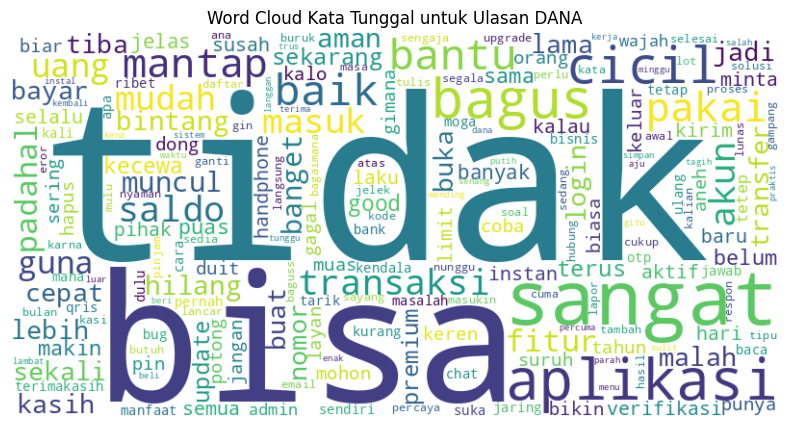

In [253]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan hanya token tunggal (tidak termasuk MWE yang digabung) menjadi satu string untuk DANA
all_single_words_dana = []
for tokens_list in df_dana['Review_Tokens_Kata']:
    for token in tokens_list:
        if '_' not in token: # Hanya sertakan kata tunggal (tidak termasuk MWE yang digabung)
            all_single_words_dana.append(token)
all_words_dana_single = ' '.join(all_single_words_dana)

# Buat objek WordCloud dengan collocations=False
wordcloud_dana_single = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_words_dana_single)

# Tampilkan word cloud untuk DANA
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dana_single, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Tunggal untuk Ulasan DANA')
plt.show()

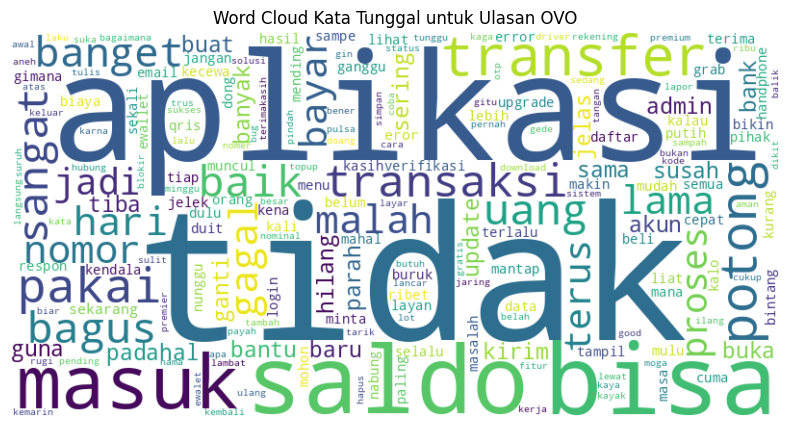

In [254]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan hanya token tunggal (tidak termasuk MWE yang digabung) menjadi satu string untuk OVO
all_single_words_ovo = []
for tokens_list in df_ovo['Review_Tokens_Kata']:
    for token in tokens_list:
        if '_' not in token: # Hanya sertakan kata tunggal (tidak termasuk MWE yang digabung)
            all_single_words_ovo.append(token)
all_words_ovo_single = ' '.join(all_single_words_ovo)

# Buat objek WordCloud dengan collocations=False
wordcloud_ovo_single = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_words_ovo_single)

# Tampilkan word cloud untuk OVO
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ovo_single, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Tunggal untuk Ulasan OVO')
plt.show()

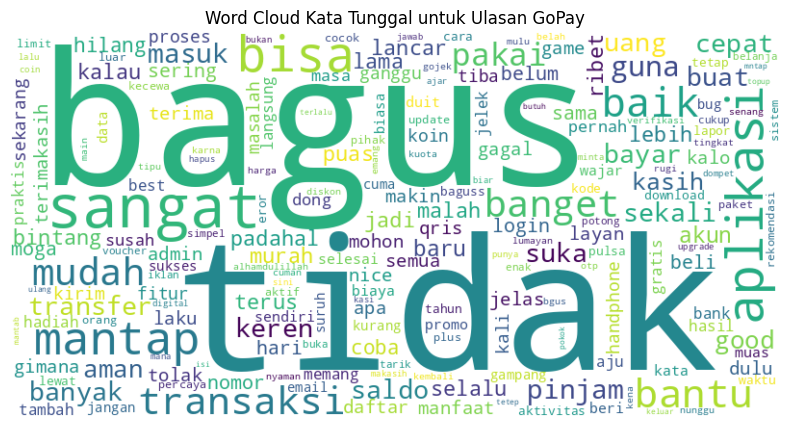

In [255]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan hanya token tunggal (tidak termasuk MWE yang digabung) menjadi satu string untuk GoPay
all_single_words_gopay = []
for tokens_list in df_gopay['Review_Tokens_Kata']:
    for token in tokens_list:
        if '_' not in token: # Hanya sertakan kata tunggal (tidak termasuk MWE yang digabung)
            all_single_words_gopay.append(token)
all_words_gopay_single = ' '.join(all_single_words_gopay)

# Buat objek WordCloud dengan collocations=False
wordcloud_gopay_single = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_words_gopay_single)

# Tampilkan word cloud untuk GoPay
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_gopay_single, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Tunggal untuk Ulasan GoPay')
plt.show()

###Pelabelan Mengunakan Rating

In [256]:
import pandas as pd

# Fungsi untuk pelabelan berdasarkan rating
def pelabelan_rating(score):
    if score >= 4:
        return 'Positif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Negatif'

# Terapkan pelabelan pada setiap DataFrame
# Pastikan untuk membuat salinan eksplisit untuk menghindari SettingWithCopyWarning
df_dana = df_dana.copy()
df_ovo = df_ovo.copy()
df_gopay = df_gopay.copy()

df_dana.loc[:, 'label_rating'] = df_dana['Rating'].apply(pelabelan_rating)
df_ovo.loc[:, 'label_rating'] = df_ovo['Rating'].apply(pelabelan_rating)
df_gopay.loc[:, 'label_rating'] = df_gopay['Rating'].apply(pelabelan_rating)

print("\n--- DANA Rating-based Labels ---")
print(df_dana['label_rating'].value_counts())
display(df_dana[['Review', 'Rating', 'Review_Tokens_Kata','label_rating']].head())

print("\n--- OVO Rating-based Labels ---")
print(df_ovo['label_rating'].value_counts())
display(df_ovo[['Review', 'Rating', 'Review_Tokens_Kata', 'label_rating']].head())

print("\n--- GoPay Rating-based Labels ---")
print(df_gopay['label_rating'].value_counts())
display(df_gopay[['Review', 'Rating', 'Review_Tokens_Kata', 'label_rating']].head())


--- DANA Rating-based Labels ---
label_rating
Positif    1515
Negatif     394
Netral       91
Name: count, dtype: int64


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                              Review_Tokens_Kata label_rating  
0                                        [bagus]      Positif  
1                                        [bagus]      Positif  
2  [cicil, padahal, sering, transaksi, aplikasi]      Negatif  
3                                        [bagus]      Positif  
4                                 [cicil, tidak]      Positif


--- OVO Rating-based Labels ---
label_rating
Negatif    1203
Positif     691
Netral      106
Name: count, dtype: int64


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata label_rating  
0                 [mending, tutup, malah, ngrepotin]      Negatif  
1  [ewallet, buruk, pernah, pakai, saldo, tambah,...      Negatif  
2  [indomaret, sampe, sekarang, masuk, kata, piha...      Negatif  
3  [putih, semua, tidak, menu, saldo, transpernya...      Negatif  
4  [topup, swap, belum, masuk, beberapa, kali, hu...      Negatif


--- GoPay Rating-based Labels ---
label_rating
Positif    1647
Negatif     284
Netral       69
Name: count, dtype: int64


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata label_rating  
0                                             [nice]      Positif  
1                                                 []      Positif  
2  [aflikasi, tidak, jelas, banget, langgan, lama...      Negatif  
3                                          [canggih]      Positif  
4                              [semua, jadi, lancar]      Positif

### Sentimen Lexicon
Tentukan daftar kata-kata positif dan negatif dalam bahasa Indonesia untuk analisis sentimen. Daftar-daftar ini akan digunakan sebagai kamus sentimen untuk menilai ulasan.

### Definisikan Kamus Sentimen


Definisikan daftar kata-kata positif dan negatif dalam bahasa Indonesia. Daftar-daftar ini akan digunakan untuk menilai sentimen ulasan. Catatan: Ini adalah kamus awal yang ilustratif dan dapat diperluas untuk akurasi yang lebih baik.


In [274]:
positive_words = [
    'bagus', 'baik', 'suka', 'mantap', 'cepat', 'mudah', 'membantu', 'puas', 'terbaik', 'senang',
    'berhasil', 'ramah', 'aman', 'lancar', 'solusi', 'hebat', 'nyaman', 'memuaskan', 'rekomendasi',
    'istimewa','bantu','hasil','mantap','mantab','moga','good','sukses','makin bagus',
]

negative_words = [
    'buruk', 'jelek', 'susah', 'sulit', 'masalah', 'error', 'gagal', 'tidak bisa', 'kecewa', 'parah',
    'lama', 'ribet', 'ganggu', 'lambat', 'lemot', 'kurang', 'tidak jelas', 'hilang', 'rusak', 'benci',
    'rugi', 'tipu', 'jeda', 'kesulitan', 'payah', 'memperburuk', 'cacat', 'penipuan', 'bahaya', 'aneh','berat',
    'bermasalah', 'komplain', 'tidak jelas', 'tidak memuaskan', 'tidak cepat', 'eror','error',
    'tidak mudah', 'tidak aman', 'tidak nyaman', 'tidak lancar','tidak','ribet','hilang','lelet','parah','nipu','anjing',

]

print("Lists for positive and negative Indonesian words have been defined.")

Lists for positive and negative Indonesian words have been defined.


### Implementasi Penilaian Sentimen


Buat fungsi untuk menghitung skor sentimen untuk setiap ulasan berdasarkan keberadaan kata-kata dari leksikon positif dan negatif. Fungsi ini akan memberikan label ‘Positif’, ‘Negatif’, atau ‘Netral’.


In [275]:
def calculate_sentiment(tokens):
    positive_score = 0
    negative_score = 0

    # Konversikan daftar leksikon menjadi himpunan untuk pencarian yang lebih cepat
    positive_words_set = set(word.lower() for word in positive_words)
    negative_words_set = set(word.lower() for word in negative_words)

    # Pisahkan kata tunggal dan frasa multi-kata dari leksikon
    single_positive = set(w for w in positive_words_set if ' ' not in w)
    multi_positive = set(w for w in positive_words_set if ' ' in w)
    single_negative = set(w for w in negative_words_set if ' ' not in w)
    multi_negative = set(w for w in negative_words_set if ' ' in w)

    # Melacak token yang sudah cocok sebagai bagian dari MWE (Multi-Word Expression)
    matched_indices = [False] * len(tokens)

    # Pertama, cocokkan frasa multi-kata (MWEs)
    # Tentukan panjang maksimum MWE untuk iterasi yang efisien
    max_mwe_len = 0
    for mwe_set in [multi_positive, multi_negative]:
        for phrase in mwe_set:
            max_mwe_len = max(max_mwe_len, len(phrase.split()))

    # Iterasi dari MWE terpanjang hingga frasa 2 kata
    for n in range(max_mwe_len, 1, -1):
        for i in range(len(tokens) - n + 1):
            # Hanya proses jika tidak ada bagian dari token ini yang sudah menjadi bagian dari MWE lain
            if all(not matched_indices[k] for k in range(i, i + n)):
                ngram_candidate = ' '.join(tokens[i:i+n]).lower()
                if ngram_candidate in multi_positive:
                    positive_score += 1
                    for k in range(i, i + n): matched_indices[k] = True
                elif ngram_candidate in multi_negative:
                    negative_score += 1
                    for k in range(i, i + n): matched_indices[k] = True

    # Kemudian, cocokkan kata tunggal yang tidak menjadi bagian dari MWE mana pun
    for i, token in enumerate(tokens):
        if not matched_indices[i]: # Hanya jika token ini belum menjadi bagian dari MWE
            clean_token = token.lower()
            if clean_token in single_positive:
                positive_score += 1
            elif clean_token in single_negative:
                negative_score += 1

    if positive_score > negative_score:
        return 'Positive'
    elif negative_score > positive_score:
        return 'Negative'
    else:
        return 'Neutral'

print("Fungsi ‘calculate_sentiment’ telah berhasil didefinisikan dan diperbarui untuk menangani frasa multi-kata.")

Fungsi ‘calculate_sentiment’ telah berhasil didefinisikan dan diperbarui untuk menangani frasa multi-kata.


In [276]:
from IPython.display import display

# Buat salinan eksplisit untuk menghindari peringatan SettingWithCopyWarning
df_dana = df_dana.copy()
df_ovo = df_ovo.copy()
df_gopay = df_gopay.copy()

# Terapkan fungsi calculate_sentiment pada ulasan yang telah di-tokenize untuk setiap DataFrame
df_dana.loc[:, 'Sentiment'] = df_dana['Review_Tokens_Kata'].apply(calculate_sentiment)
df_ovo.loc[:, 'Sentiment'] = df_ovo['Review_Tokens_Kata'].apply(calculate_sentiment)
df_gopay.loc[:, 'Sentiment'] = df_gopay['Review_Tokens_Kata'].apply(calculate_sentiment)

# Tampilkan beberapa baris pertama dari setiap DataFrame dengan kolom baru 'Sentiment'
print("\nDANA Reviews with Sentiment:")
print(df_dana['Sentiment'].value_counts())
display(df_dana[['Review','Rating', 'Review_Tokens_Kata', 'Sentiment']].head())
print("Sentiment Distribution for DANA:")

print("\nOVO Reviews with Sentiment:")
print(df_ovo['Sentiment'].value_counts())
display(df_ovo[['Review','Rating', 'Review_Tokens_Kata', 'Sentiment']].head())
print("Sentiment Distribution for OVO:")

print("\nGoPay Reviews with Sentiment:")
print(df_gopay['Sentiment'].value_counts())
display(df_gopay[['Review','Rating', 'Review_Tokens_Kata', 'Sentiment']].head())
print("Sentiment Distribution for GoPay:")


print("\nAnalisis sentimen telah berhasil diterapkan pada ulasan DANA, OVO, dan GoPay.")


DANA Reviews with Sentiment:
Sentiment
Positive    839
Neutral     609
Negative    552
Name: count, dtype: int64


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                              Review_Tokens_Kata Sentiment  
0                                        [bagus]  Positive  
1                                        [bagus]  Positive  
2  [cicil, padahal, sering, transaksi, aplikasi]   Neutral  
3                                        [bagus]  Positive  
4                                 [cicil, tidak]  Negative

Sentiment Distribution for DANA:

OVO Reviews with Sentiment:
Sentiment
Negative    1099
Neutral      527
Positive     374
Name: count, dtype: int64


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata Sentiment  
0                 [mending, tutup, malah, ngrepotin]   Neutral  
1  [ewallet, buruk, pernah, pakai, saldo, tambah,...  Negative  
2  [indomaret, sampe, sekarang, masuk, kata, piha...   Neutral  
3  [putih, semua, tidak, menu, saldo, transpernya...  Negative  
4  [topup, swap, belum, masuk, beberapa, kali, hu...  Negative

Sentiment Distribution for OVO:

GoPay Reviews with Sentiment:
Sentiment
Positive    1047
Neutral      680
Negative     273
Name: count, dtype: int64


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata Sentiment  
0                                             [nice]   Neutral  
1                                                 []   Neutral  
2  [aflikasi, tidak, jelas, banget, langgan, lama...  Negative  
3                                          [canggih]   Neutral  
4                              [semua, jadi, lancar]  Positive

Sentiment Distribution for GoPay:

Analisis sentimen telah berhasil diterapkan pada ulasan DANA, OVO, dan GoPay.


### Visualisasi Word Cloud Setelah Analisis Sentimen (Kata Tunggal)

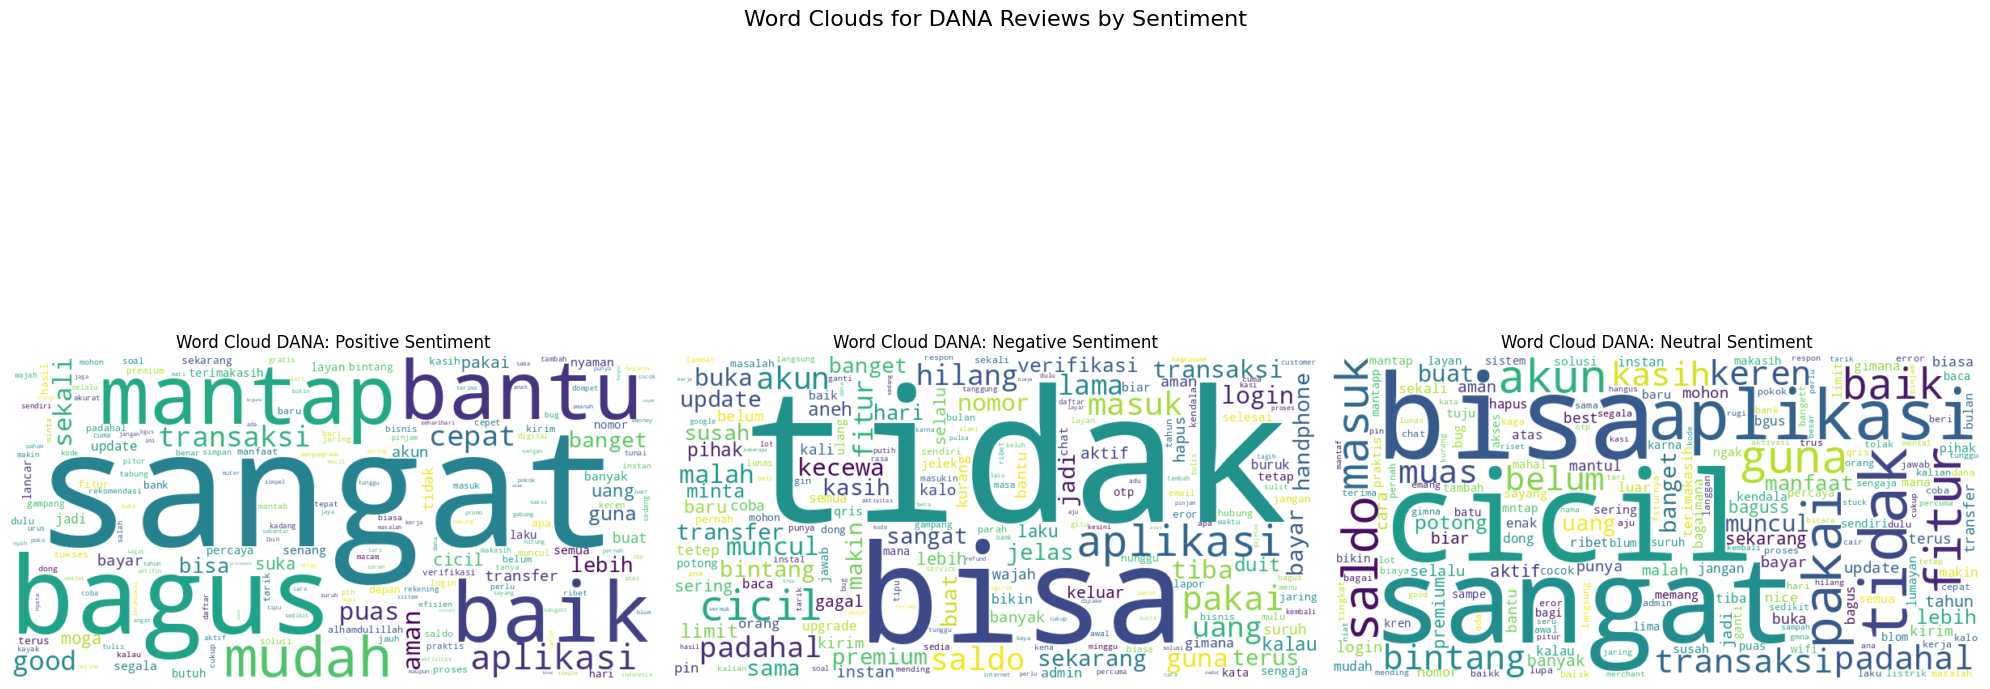

Word clouds for DANA's Positive, Negative, and Neutral Sentiments generated and displayed.


In [260]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for Positive Sentiment in DANA
df_dana_positive = df_dana[df_dana['Sentiment'] == 'Positive']
# Filter for Negative Sentiment in DANA
df_dana_negative = df_dana[df_dana['Sentiment'] == 'Negative']
# Filter for Neutral Sentiment in DANA
df_dana_neutral = df_dana[df_dana['Sentiment'] == 'Neutral']

# Function to combine tokens for word cloud generation
def combine_tokens_for_wordcloud(df_sentiment):
    all_words = []
    for tokens_list in df_sentiment['Review_Tokens_Kata']:
        for token in tokens_list:
            if '_' not in token: # Only include single words
                all_words.append(token)
    return ' '.join(all_words)

# Combine tokens for each sentiment
all_positive_words_dana_str = combine_tokens_for_wordcloud(df_dana_positive)
all_negative_words_dana_str = combine_tokens_for_wordcloud(df_dana_negative)
all_neutral_words_dana_str = combine_tokens_for_wordcloud(df_dana_neutral)

# Create WordCloud objects for each sentiment
wordcloud_dana_positive = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_positive_words_dana_str)
wordcloud_dana_negative = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_negative_words_dana_str)
wordcloud_dana_neutral = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_neutral_words_dana_str)

# Display the Word Clouds in a single figure with subplots
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
plt.imshow(wordcloud_dana_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud DANA: Positive Sentiment')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
plt.imshow(wordcloud_dana_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud DANA: Negative Sentiment')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
plt.imshow(wordcloud_dana_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud DANA: Neutral Sentiment')

plt.suptitle('Word Clouds for DANA Reviews by Sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print("Word clouds for DANA's Positive, Negative, and Neutral Sentiments generated and displayed.")

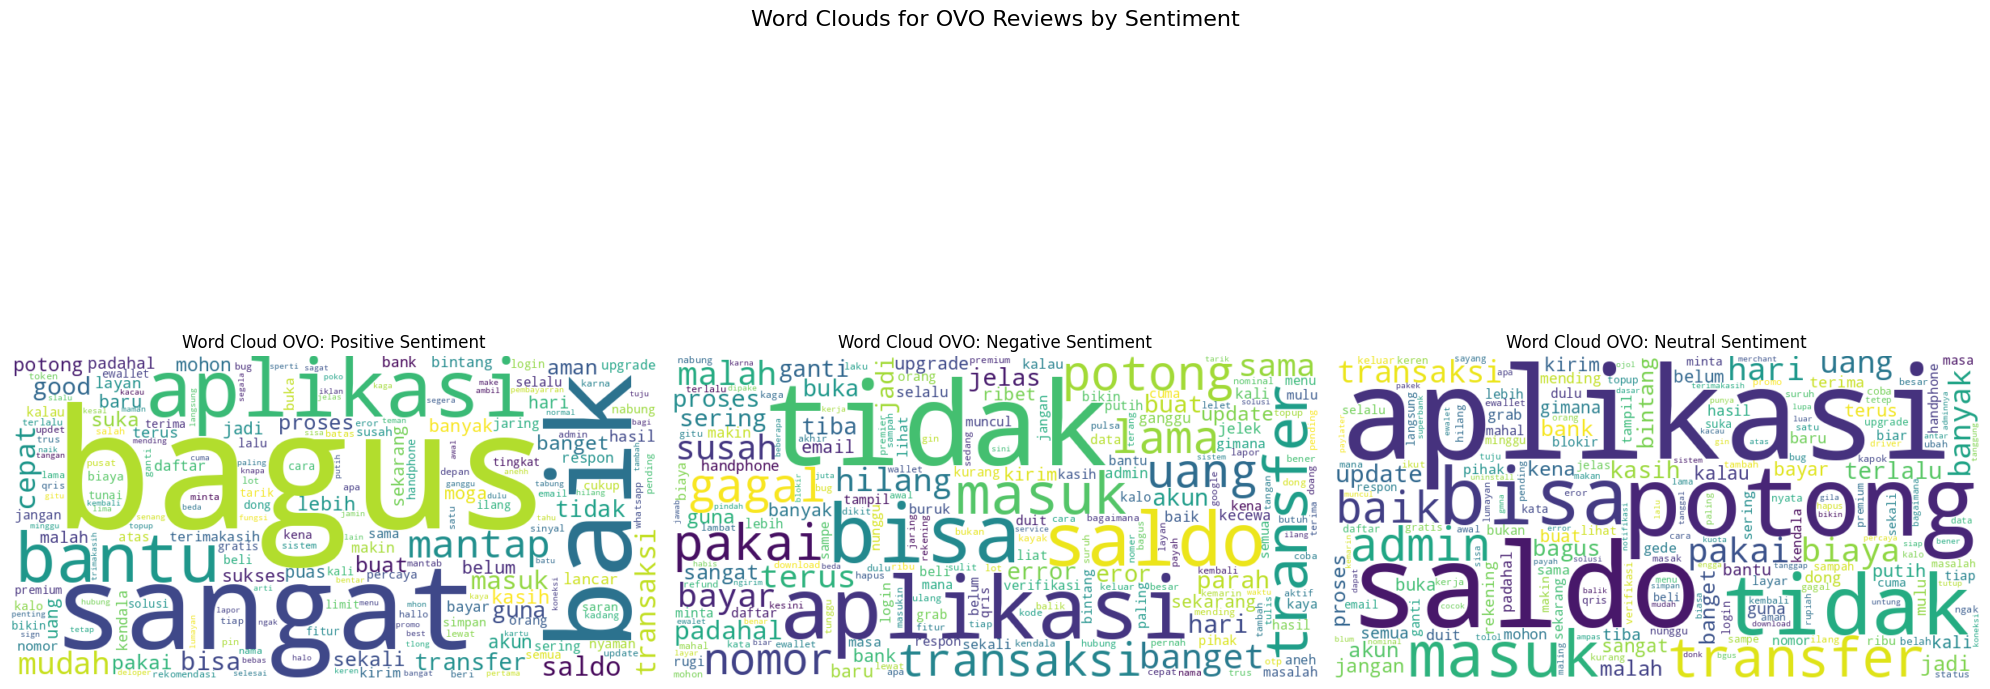

Word clouds for OVO's Positive, Negative, and Neutral Sentiments generated and displayed.


In [261]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for Positive Sentiment in OVO
df_ovo_positive = df_ovo[df_ovo['Sentiment'] == 'Positive']
# Filter for Negative Sentiment in OVO
df_ovo_negative = df_ovo[df_ovo['Sentiment'] == 'Negative']
# Filter for Neutral Sentiment in OVO
df_ovo_neutral = df_ovo[df_ovo['Sentiment'] == 'Neutral']

# Function to combine tokens for word cloud generation
def combine_tokens_for_wordcloud(df_sentiment):
    all_words = []
    for tokens_list in df_sentiment['Review_Tokens_Kata']:
        for token in tokens_list:
            if '_' not in token: # Only include single words
                all_words.append(token)
    return ' '.join(all_words)

# Combine tokens for each sentiment
all_positive_words_ovo_str = combine_tokens_for_wordcloud(df_ovo_positive)
all_negative_words_ovo_str = combine_tokens_for_wordcloud(df_ovo_negative)
all_neutral_words_ovo_str = combine_tokens_for_wordcloud(df_ovo_neutral)

# Create WordCloud objects for each sentiment
wordcloud_ovo_positive = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_positive_words_ovo_str)
wordcloud_ovo_negative = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_negative_words_ovo_str)
wordcloud_ovo_neutral = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_neutral_words_ovo_str)

# Display the Word Clouds in a single figure with subplots
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
plt.imshow(wordcloud_ovo_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud OVO: Positive Sentiment')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
plt.imshow(wordcloud_ovo_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud OVO: Negative Sentiment')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
plt.imshow(wordcloud_ovo_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud OVO: Neutral Sentiment')

plt.suptitle('Word Clouds for OVO Reviews by Sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print("Word clouds for OVO's Positive, Negative, and Neutral Sentiments generated and displayed.")

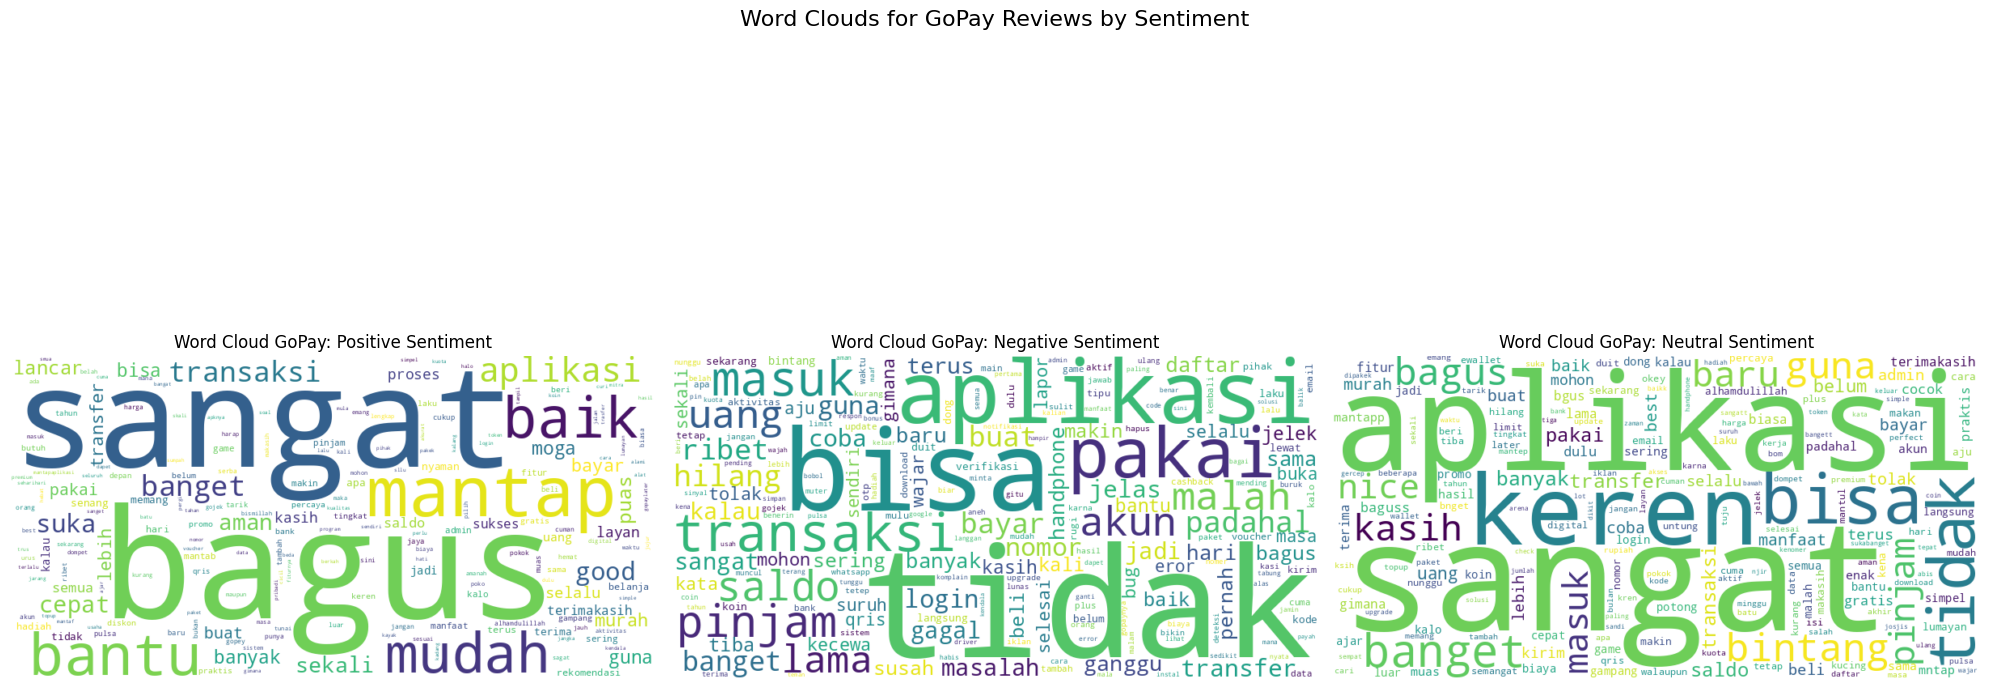

Word clouds for GoPay's Positive, Negative, and Neutral Sentiments generated and displayed.


In [262]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for Positive Sentiment in GoPay
df_gopay_positive = df_gopay[df_gopay['Sentiment'] == 'Positive']
# Filter for Negative Sentiment in GoPay
df_gopay_negative = df_gopay[df_gopay['Sentiment'] == 'Negative']
# Filter for Neutral Sentiment in GoPay
df_gopay_neutral = df_gopay[df_gopay['Sentiment'] == 'Neutral']

# Function to combine tokens for word cloud generation
def combine_tokens_for_wordcloud(df_sentiment):
    all_words = []
    for tokens_list in df_sentiment['Review_Tokens_Kata']:
        for token in tokens_list:
            if '_' not in token: # Only include single words
                all_words.append(token)
    return ' '.join(all_words)

# Combine tokens for each sentiment
all_positive_words_gopay_str = combine_tokens_for_wordcloud(df_gopay_positive)
all_negative_words_gopay_str = combine_tokens_for_wordcloud(df_gopay_negative)
all_neutral_words_gopay_str = combine_tokens_for_wordcloud(df_gopay_neutral)

# Create WordCloud objects for each sentiment
wordcloud_gopay_positive = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_positive_words_gopay_str)
wordcloud_gopay_negative = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_negative_words_gopay_str)
wordcloud_gopay_neutral = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_neutral_words_gopay_str)

# Display the Word Clouds in a single figure with subplots
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
plt.imshow(wordcloud_gopay_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud GoPay: Positive Sentiment')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
plt.imshow(wordcloud_gopay_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud GoPay: Negative Sentiment')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
plt.imshow(wordcloud_gopay_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud GoPay: Neutral Sentiment')

plt.suptitle('Word Clouds for GoPay Reviews by Sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print("Word clouds for GoPay's Positive, Negative, and Neutral Sentiments generated and displayed.")

### Generate N-grams (4-grams)


Buat 4-grams (urutan empat kata) dari kolom ‘Review_Tokens_Kata’ untuk setiap DataFrame (df_dana, df_ovo, df_gopay). 4-grams ini akan digunakan untuk analisis frekuensi.


In [263]:
from nltk.util import ngrams
from IPython.display import display

# 1. Definisikan fungsi generate_ngrams
def generate_ngrams(tokens, n):
    # Pastikan tokens adalah daftar
    if not isinstance(tokens, list):
        return []
    # Konversikan token menjadi ngrams, lalu menjadi daftar string yang digabungkan
    return [' '.join(gram) for gram in list(ngrams(tokens, n))]

# Buat salinan eksplisit untuk menghindari peringatan SettingWithCopyWarning
df_dana = df_dana.copy()
df_ovo = df_ovo.copy()
df_gopay = df_gopay.copy()

# 2. Gunakan fungsi generate_ngrams untuk membuat 4-grams
df_dana.loc[:, 'Review_4_grams'] = df_dana['Review_Tokens_Kata'].apply(lambda x: generate_ngrams(x, 4))
df_ovo.loc[:, 'Review_4_grams'] = df_ovo['Review_Tokens_Kata'].apply(lambda x: generate_ngrams(x, 4))
df_gopay.loc[:, 'Review_4_grams'] = df_gopay['Review_Tokens_Kata'].apply(lambda x: generate_ngrams(x, 4))

# 3. Tampilkan header dari setiap DataFrame dengan kolom baru.
print("\nDANA Reviews with 4-grams:")
display(df_dana[['Review','Rating', 'Review_Tokens_Kata', 'Review_4_grams','Sentiment']].head())

print("\nOVO Reviews with 4-grams:")
display(df_ovo[['Review','Rating', 'Review_Tokens_Kata', 'Review_4_grams','Sentiment']].head())

print("\nGoPay Reviews with 4-grams:")
display(df_gopay[['Review','Rating', 'Review_Tokens_Kata', 'Review_4_grams','Sentiment']].head())

print("\n4-grams generation for DANA, OVO, and GoPay has been completed successfully.")


DANA Reviews with 4-grams:


Review  Rating  \
0                                          bagus ini       5   
1                                              bagus       5   
2  yang lain ada dana cicil saya gx ada padahal s...       1   
3                                              bagus       5   
4                   dana cicil saya kenapa tidak ada       5   

                              Review_Tokens_Kata  \
0                                        [bagus]   
1                                        [bagus]   
2  [cicil, padahal, sering, transaksi, aplikasi]   
3                                        [bagus]   
4                                 [cicil, tidak]   

                                      Review_4_grams Sentiment  
0                                                 []  Positive  
1                                                 []  Positive  
2  [cicil padahal sering transaksi, padahal serin...   Neutral  
3                                                 []  Positive  
4                                                 []  Negative


OVO Reviews with 4-grams:


Review  Rating  \
0                    mending ditutup malah ngrepotin       1   
1  ewallet terburuk yang pernah ku pakai top up s...       1   
2  saya top up ovo di indomaret tgl sampe sekaran...       1   
3  ovo saya kok putih semua tidak ada menu saldon...       2   
4  topup swap belum masuk sudah beberapa kali hub...       1   

                                  Review_Tokens_Kata  \
0                 [mending, tutup, malah, ngrepotin]   
1  [ewallet, buruk, pernah, pakai, saldo, tambah,...   
2  [indomaret, sampe, sekarang, masuk, kata, piha...   
3  [putih, semua, tidak, menu, saldo, transpernya...   
4  [topup, swap, belum, masuk, beberapa, kali, hu...   

                                      Review_4_grams Sentiment  
0                    [mending tutup malah ngrepotin]   Neutral  
1  [ewallet buruk pernah pakai, buruk pernah paka...  Negative  
2  [indomaret sampe sekarang masuk, sampe sekaran...   Neutral  
3  [putih semua tidak menu, semua tidak menu sald...  Negative  
4  [topup swap belum masuk, swap belum masuk bebe...  Negative


GoPay Reviews with 4-grams:


Review  Rating  \
0                                               nice       5   
1                                                oke       5   
2  ini aflikasi gopay tidak jelas banget saya sud...       1   
3                                            canggih       5   
4                               semuanya jadi lancar       5   

                                  Review_Tokens_Kata  \
0                                             [nice]   
1                                                 []   
2  [aflikasi, tidak, jelas, banget, langgan, lama...   
3                                          [canggih]   
4                              [semua, jadi, lancar]   

                                      Review_4_grams Sentiment  
0                                                 []   Neutral  
1                                                 []   Neutral  
2  [aflikasi tidak jelas banget, tidak jelas bang...  Negative  
3                                                 []   Neutral  
4                                                 []  Positive


4-grams generation for DANA, OVO, and GoPay has been completed successfully.


### Ekstraksi N-gram 4 Teratas

Kode di atas bertujuan untuk mengidentifikasi **frasa empat kata (4-gram) yang paling sering muncul** dalam ulasan pengguna untuk aplikasi DANA, OVO, dan GoPay.



#### Analisis dan visualisasikan 20 4-gram teratas yang paling sering muncul untuk DANA, OVO, dan GoPay dari kolom ‘Review_Tokens_Kata’

In [264]:
from collections import Counter
import itertools
import pandas as pd
from IPython.display import display

# Fungsi untuk mendapatkan N-gram teratas
def get_top_ngrams(df, ngram_column, n=20):
    all_ngrams = list(itertools.chain.from_iterable(df[ngram_column]))
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(n)

# Dapatkan 20 kata 4-grams teratas untuk dana
top_20_dana_4_grams = get_top_ngrams(df_dana, 'Review_4_grams', 20)
print("\nTop 20 4-grams for DANA:")
display(pd.DataFrame(top_20_dana_4_grams, columns=['4-gram', 'Frequency']))

# Dapatkan 20 kata 4-grams teratas untuk ovo
top_20_ovo_4_grams = get_top_ngrams(df_ovo, 'Review_4_grams', 20)
print("\nTop 20 4-grams for OVO:")
display(pd.DataFrame(top_20_ovo_4_grams, columns=['4-gram', 'Frequency']))

# Dapatkan 20 kata 4-grams teratas untuk gopay
top_20_gopay_4_grams = get_top_ngrams(df_gopay, 'Review_4_grams', 20)
print("\nTop 20 4-grams for GoPay:")
display(pd.DataFrame(top_20_gopay_4_grams, columns=['4-gram', 'Frequency']))

print("\nTop 20 4-grams extracted for DANA, OVO, and GoPay.")


Top 20 4-grams for DANA:


4-gram  Frequency
0               cicil tidak bisa guna         11
1              fitur cicil tidak bisa          9
2               tidak bisa masuk akun          7
3               cicil tidak bisa buka          6
4              cicil tidak bisa pakai          6
5             kasih bintang biar baca          5
6              limit cicil tidak bisa          5
7             update malah tidak bisa          4
8               tidak bisa guna cicil          4
9          sengaja kasih bintang biar          4
10           tidak bisa masuk padahal          3
11              akun tidak bisa login          3
12          cicil tidak sedia padahal          3
13          tidak sedia padahal limit          3
14           aplikasi tidak bisa buka          3
15            tidak bisa guna padahal          3
16              tidak bisa login akun          3
17           belum premium tidak bisa          3
18  customer service customer service          3
19             malah tidak bisa masuk          2


Top 20 4-grams for OVO:


4-gram  Frequency
0       tidak bisa lihat saldo          9
1        tidak bisa liat saldo          9
2     aplikasi tidak bisa buka          6
3       tidak bisa ganti nomor          5
4        malah tidak bisa buka          5
5       saldo tiba tiba hilang          5
6       lama makin tidak jelas          4
7      update malah tidak bisa          4
8       makin lama makin tidak          4
9   tidak bisa upgrade premium          3
10      saldo tidak bisa lihat          3
11       tidak bisa masuk akun          3
12    tidak masuk saldo potong          3
13    update bukan makin bagus          3
14     bukan makin bagus malah          3
15    hasil saldo tidak tambah          3
16      putih semua tidak liat          3
17   proses terus saldo potong          3
18       malah tidak bisa liat          3
19  update google play service          3


Top 20 4-grams for GoPay:


4-gram  Frequency
0   deteksi aktivitas tidak wajar          3
1   tidak bisa lanjutin transaksi          3
2           qris tidak bisa pakai          2
3          tidak bisa pakai tidak          2
4           bisa pakai tidak bisa          2
5           tidak bisa login akun          2
6      rusak tidak bisa transaksi          2
7          limit besar tidak bisa          2
8          besar tidak bisa pakai          2
9        tidak bisa login padahal          2
10        update malah tidak bisa          2
11          malah tidak bisa buka          2
12          tidak bisa masuk akun          2
13        bisa masuk akun sendiri          2
14       mohon bantu terima kasih          2
15    aplikasi sangat bantu mudah          2
16         uang bukan sekali kali          2
17        sangat bagus mudah guna          2
18      tidak bisa laku transaksi          2
19      aplikasi bagus tidak bisa          2


Top 20 4-grams extracted for DANA, OVO, and GoPay.


 ## visualisasikan 20 4-gram teratas yang paling sering muncul untuk DANA, OVO, dan GoPay

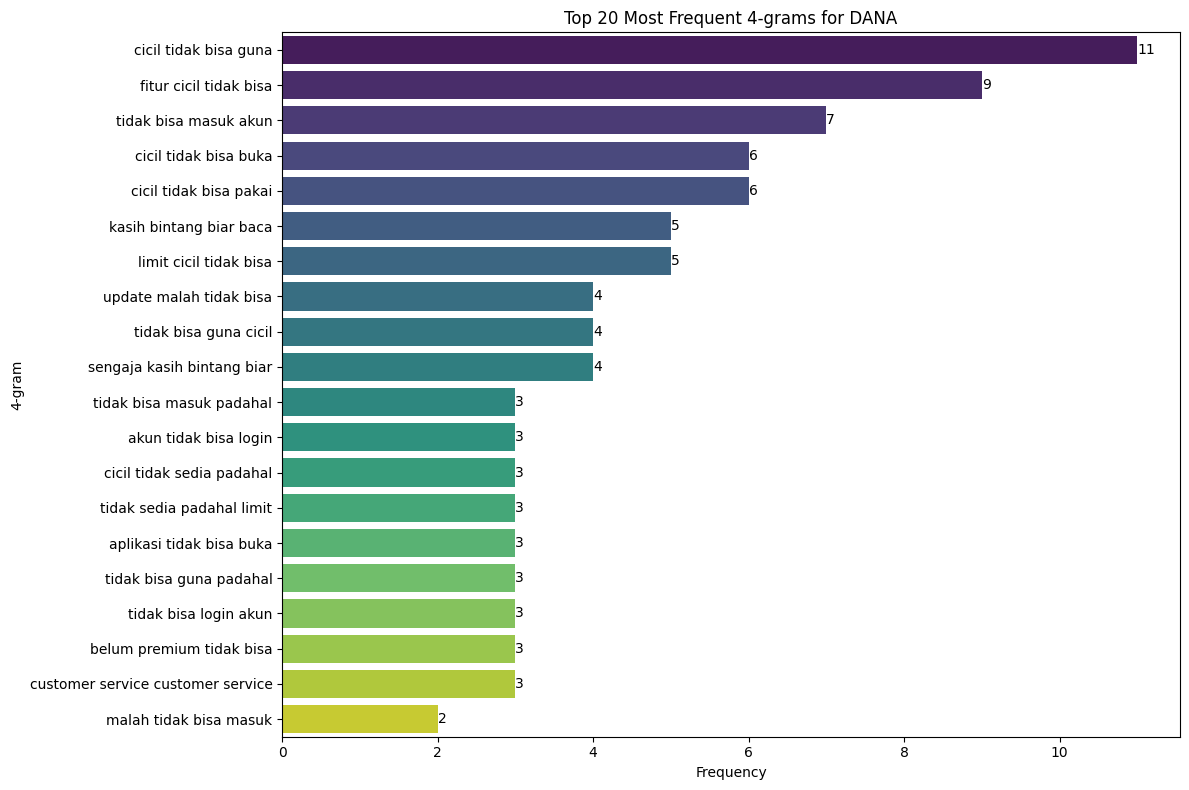

Bar chart for DANA's top 20 4-grams displayed with frequency counts.


In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data untuk pembuatan grafik untuk DANA
df_top_20_dana_4_grams = pd.DataFrame(top_20_dana_4_grams, columns=['4-gram', 'Frequency'])

# Buat diagram batang untuk DANA
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_dana_4_grams, hue='4-gram', legend=False, palette='viridis')
plt.title('Top 20 Most Frequent 4-grams for DANA')
plt.xlabel('Frequency')
plt.ylabel('4-gram')

# Tambahkan jumlah frekuensi di ujung setiap bar
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,    # Posisi teks (x, y)
            '{:1.0f}'.format(p.get_width()),                 # Format teks
            ha='left', va='center', fontsize=10, color='black') # Penataan dan gaya teks

plt.tight_layout()
plt.show()

print("Bar chart for DANA's top 20 4-grams displayed with frequency counts.")

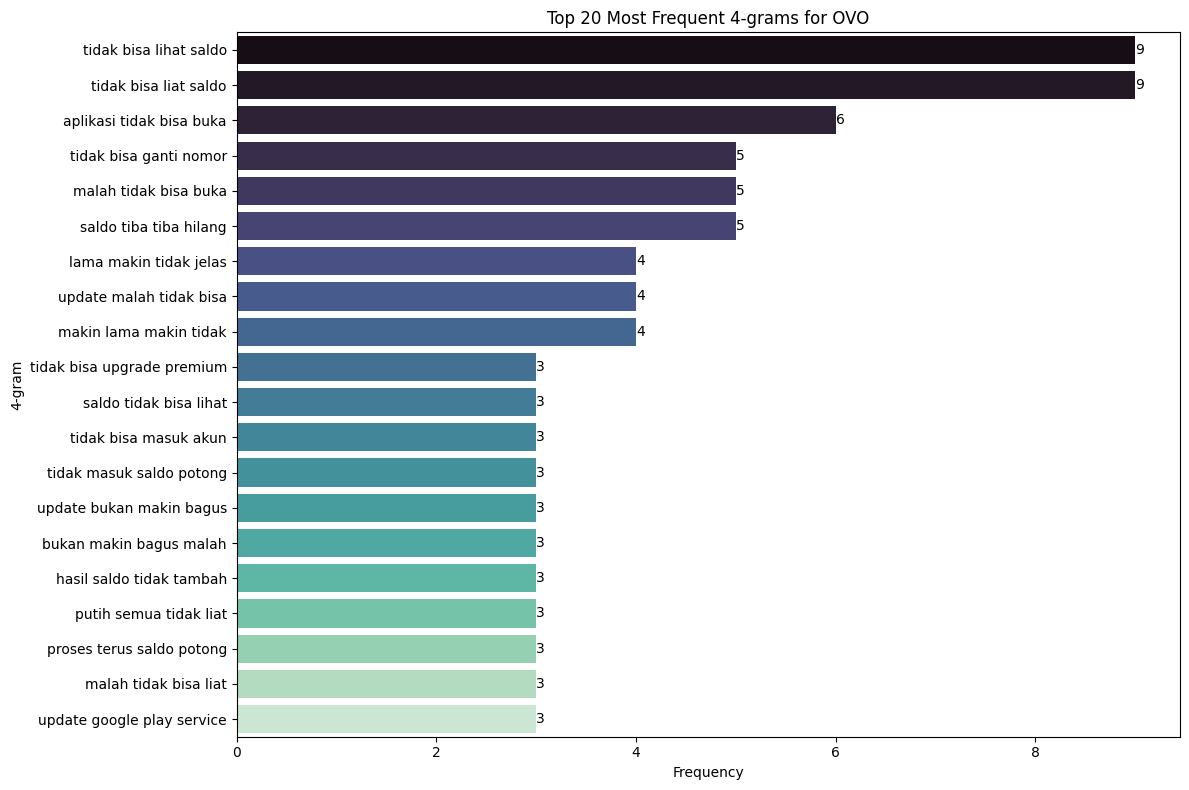

Bar chart for OVO's top 20 4-grams displayed with frequency counts.


In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data untuk pembuatan grafik untuk OVO
df_top_20_ovo_4_grams = pd.DataFrame(top_20_ovo_4_grams, columns=['4-gram', 'Frequency'])

# Buat diagram batang untuk OVO
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_ovo_4_grams, hue='4-gram', legend=False, palette='mako')
plt.title('Top 20 Most Frequent 4-grams for OVO')
plt.xlabel('Frequency')
plt.ylabel('4-gram')

# Tambahkan jumlah frekuensi di ujung setiap bar
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,    # Posisi teks (x, y)
            '{:1.0f}'.format(p.get_width()),                 # Format teks
            ha='left', va='center', fontsize=10, color='black') # Penataan dan gaya teks

plt.tight_layout()
plt.show()

print("Bar chart for OVO's top 20 4-grams displayed with frequency counts.")

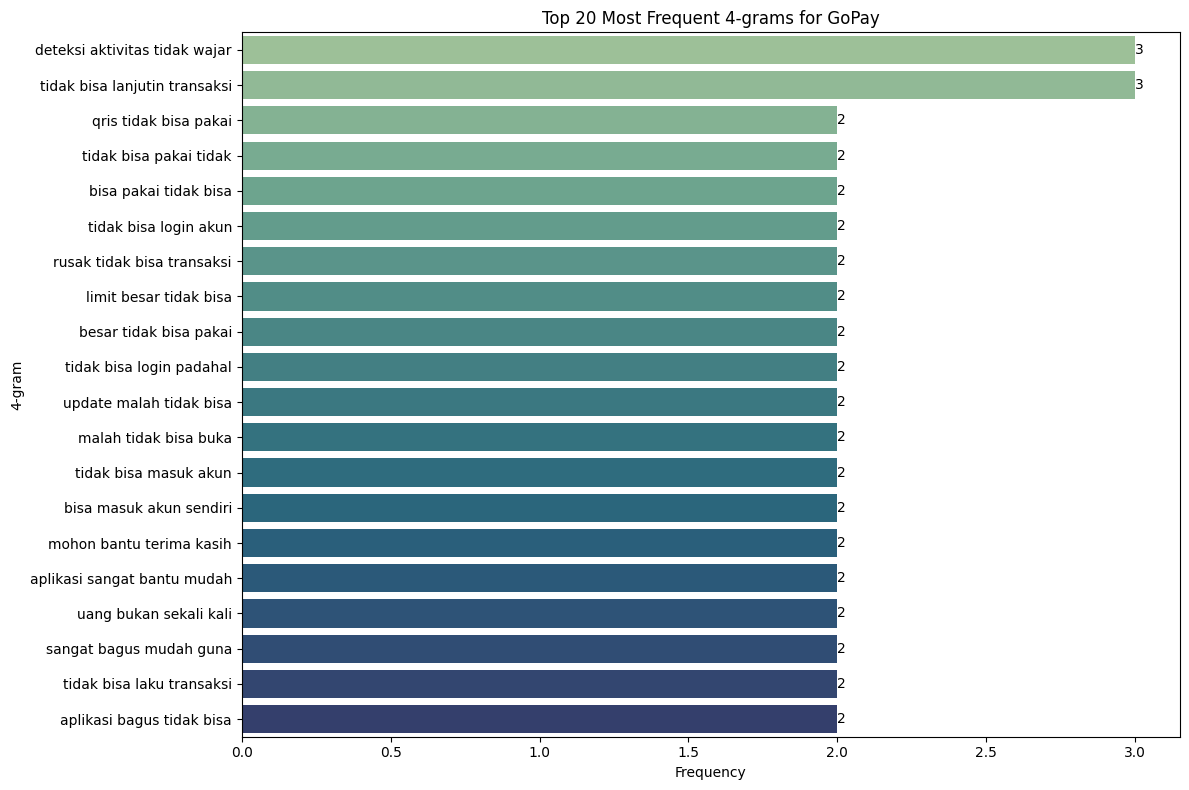

Bar chart for GoPay's top 20 4-grams displayed with frequency counts.


In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Siapkan data untuk pembuatan grafik untuk GoPay
df_top_20_gopay_4_grams = pd.DataFrame(top_20_gopay_4_grams, columns=['4-gram', 'Frequency'])

# Buat diagram batang untuk GoPay
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_gopay_4_grams, hue='4-gram', legend=False, palette='crest')
plt.title('Top 20 Most Frequent 4-grams for GoPay')
plt.xlabel('Frequency')
plt.ylabel('4-gram')

# Tambahkan jumlah frekuensi di ujung setiap bar
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,    # Posisi teks (x, y)
            '{:1.0f}'.format(p.get_width()),                 # Format teks
            ha='left', va='center', fontsize=10, color='black') # Penataan dan gaya teks

plt.tight_layout()
plt.show()

print("Bar chart for GoPay's top 20 4-grams displayed with frequency counts.")

### Visualisasi Perbandingan Sentimen Berdasarkan Rating dan Leksikon (DANA)

Grafik ini menampilkan distribusi sentimen untuk aplikasi DANA, membandingkan hasil pelabelan berdasarkan rating bintang dengan hasil analisis sentimen berbasis leksikon.

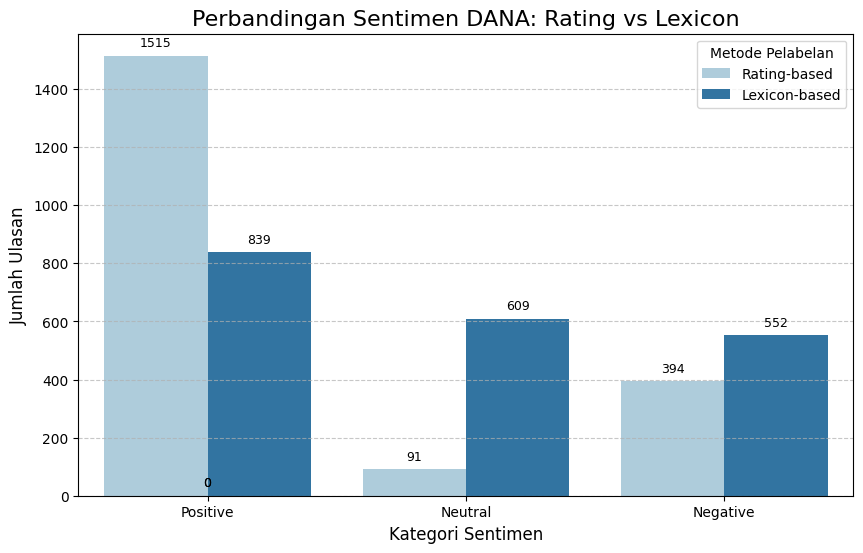

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Persiapan data untuk DANA
sentiment_rating_dana = df_dana['label_rating'].value_counts().reindex(['Positif', 'Netral', 'Negatif']).fillna(0).reset_index()
sentiment_rating_dana.columns = ['Sentiment_Category', 'Count']
sentiment_rating_dana['Method'] = 'Rating-based'
# Satukan nama kategori sentimen
sentiment_rating_dana['Sentiment_Category'] = sentiment_rating_dana['Sentiment_Category'].map({'Positif': 'Positive', 'Netral': 'Neutral', 'Negatif': 'Negative'})

sentiment_lexicon_dana = df_dana['Sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative']).fillna(0).reset_index()
sentiment_lexicon_dana.columns = ['Sentiment_Category', 'Count']
sentiment_lexicon_dana['Method'] = 'Lexicon-based'

# Gabungkan data
combined_dana_sentiment = pd.concat([sentiment_rating_dana, sentiment_lexicon_dana])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sentiment_Category', y='Count', hue='Method', data=combined_dana_sentiment, palette='Paired') # Ganti palette
plt.title('Perbandingan Sentimen DANA: Rating vs Lexicon', fontsize=16)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.legend(title='Metode Pelabelan')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=9, color='black')

plt.show()

### Visualisasi Perbandingan Sentimen Berdasarkan Rating dan Leksikon (OVO)

Grafik ini menampilkan distribusi sentimen untuk aplikasi OVO, membandingkan hasil pelabelan berdasarkan rating bintang dengan hasil analisis sentimen berbasis leksikon.

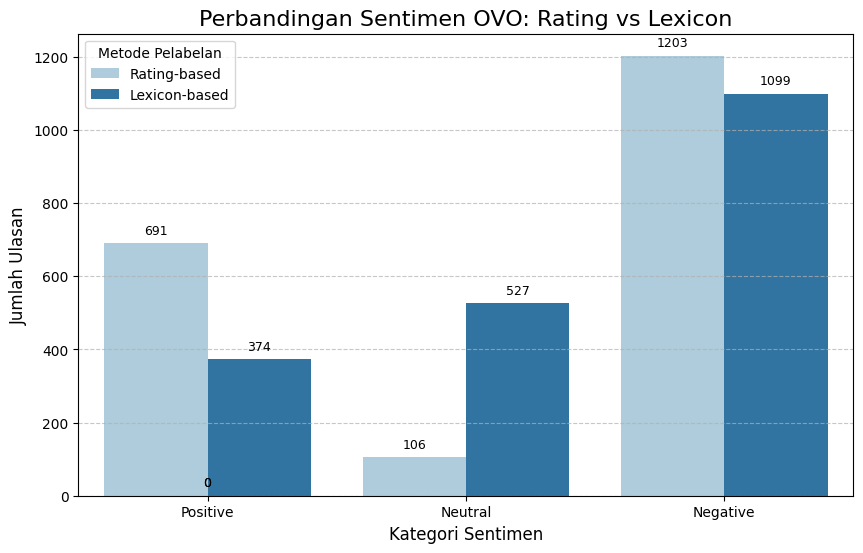

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Persiapan data untuk OVO
sentiment_rating_ovo = df_ovo['label_rating'].value_counts().reindex(['Positif', 'Netral', 'Negatif']).fillna(0).reset_index()
sentiment_rating_ovo.columns = ['Sentiment_Category', 'Count']
sentiment_rating_ovo['Method'] = 'Rating-based'
# Satukan nama kategori sentimen
sentiment_rating_ovo['Sentiment_Category'] = sentiment_rating_ovo['Sentiment_Category'].map({'Positif': 'Positive', 'Netral': 'Neutral', 'Negatif': 'Negative'})

sentiment_lexicon_ovo = df_ovo['Sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative']).fillna(0).reset_index()
sentiment_lexicon_ovo.columns = ['Sentiment_Category', 'Count']
sentiment_lexicon_ovo['Method'] = 'Lexicon-based'

# Gabungkan data
combined_ovo_sentiment = pd.concat([sentiment_rating_ovo, sentiment_lexicon_ovo])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sentiment_Category', y='Count', hue='Method', data=combined_ovo_sentiment, palette='Paired') # Ganti palette
plt.title('Perbandingan Sentimen OVO: Rating vs Lexicon', fontsize=16)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.legend(title='Metode Pelabelan')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=9, color='black')

plt.show()

### Visualisasi Perbandingan Sentimen Berdasarkan Rating dan Leksikon (GoPay)

Grafik ini menampilkan distribusi sentimen untuk aplikasi GoPay, membandingkan hasil pelabelan berdasarkan rating bintang dengan hasil analisis sentimen berbasis leksikon.

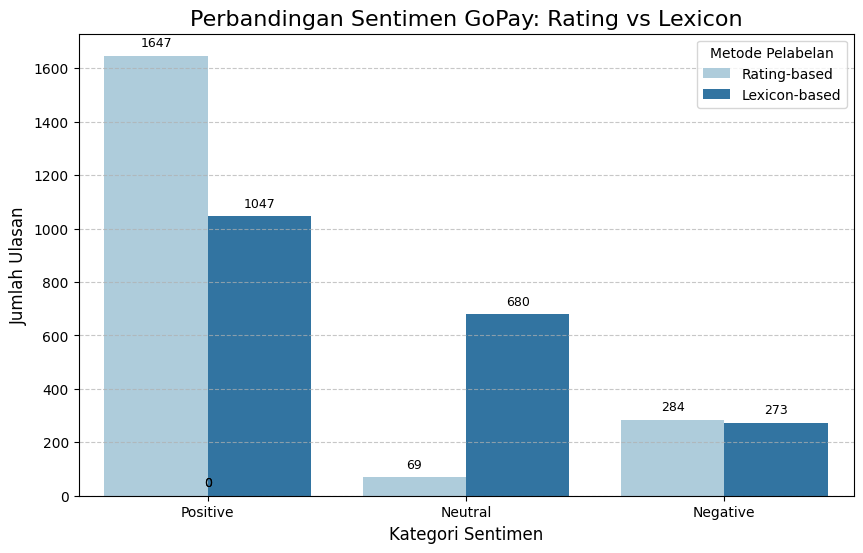

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Persiapan data untuk GoPay
sentiment_rating_gopay = df_gopay['label_rating'].value_counts().reindex(['Positif', 'Netral', 'Negatif']).fillna(0).reset_index()
sentiment_rating_gopay.columns = ['Sentiment_Category', 'Count']
sentiment_rating_gopay['Method'] = 'Rating-based'
# Satukan nama kategori sentimen
sentiment_rating_gopay['Sentiment_Category'] = sentiment_rating_gopay['Sentiment_Category'].map({'Positif': 'Positive', 'Netral': 'Neutral', 'Negatif': 'Negative'})

sentiment_lexicon_gopay = df_gopay['Sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative']).fillna(0).reset_index()
sentiment_lexicon_gopay.columns = ['Sentiment_Category', 'Count']
sentiment_lexicon_gopay['Method'] = 'Lexicon-based'

# Gabungkan data
combined_gopay_sentiment = pd.concat([sentiment_rating_gopay, sentiment_lexicon_gopay])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sentiment_Category', y='Count', hue='Method', data=combined_gopay_sentiment, palette='Paired') # Ganti palette
plt.title('Perbandingan Sentimen GoPay: Rating vs Lexicon', fontsize=16)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.legend(title='Metode Pelabelan')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=9, color='black')

plt.show()

### Extract and Visualize Top 4-grams for DANA by Sentiment


Filter ulasan DANA berdasarkan sentimen 'Positive', 'Negative', dan 'Neutral'. Untuk setiap sentimen, ekstrak 20 4-gram yang paling sering muncul dan visualisasikan menggunakan diagram batang dalam satu gambar dengan tiga subplot. Pastikan jumlah frekuensi ditampilkan dan legenda disediakan untuk kejelasan.


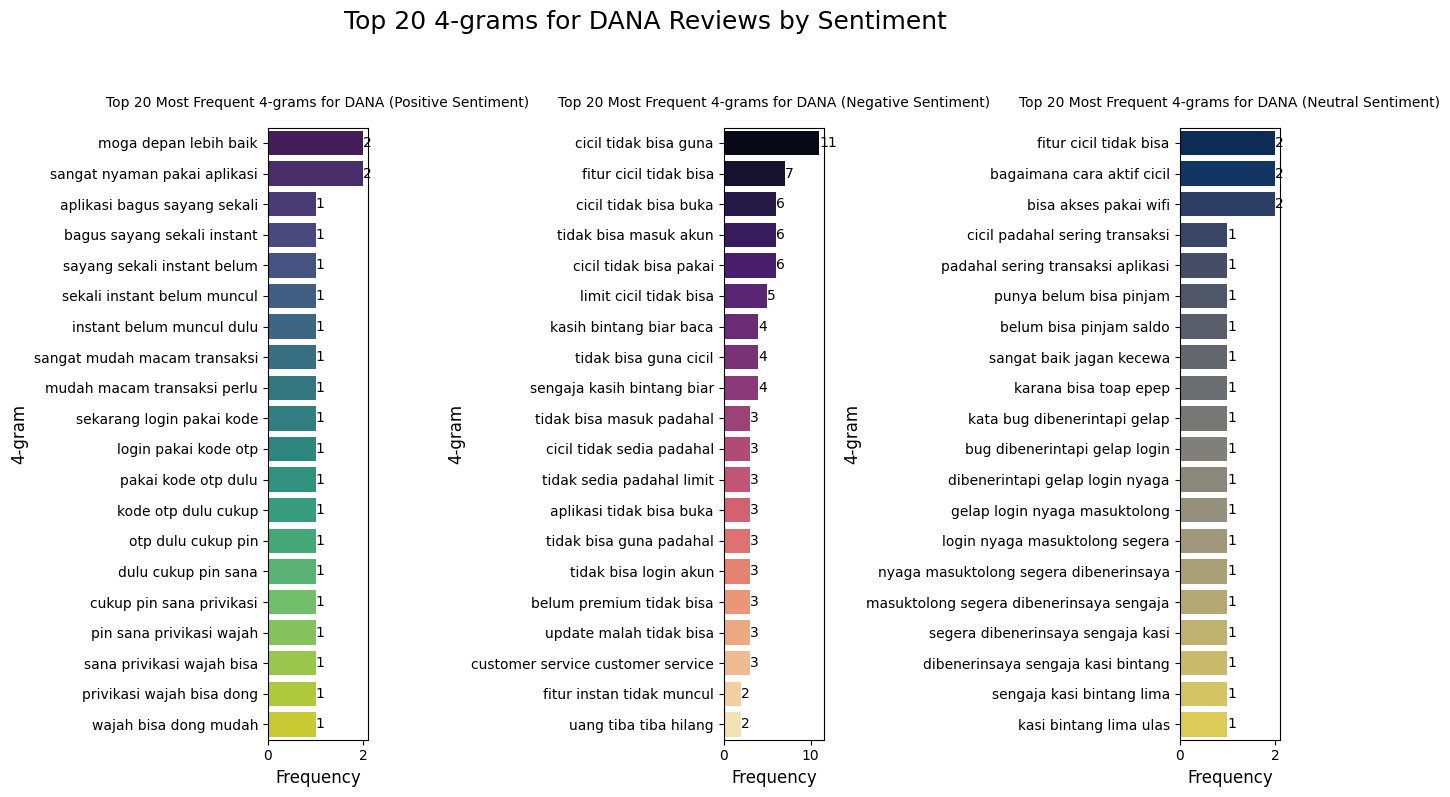

Visualizations of top 20 4-grams for DANA by sentiment have been generated.


In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import itertools

# Ensure get_top_ngrams is defined (it was defined in a previous cell)
# It's good practice to re-define or ensure its availability if the environment resets
def get_top_ngrams(df, ngram_column, n=20):
    all_ngrams = list(itertools.chain.from_iterable(df[ngram_column]))
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(n)

# 1. Filter df_dana DataFrame by sentiment
df_dana_positive_sentiment = df_dana[df_dana['Sentiment'] == 'Positive']
df_dana_negative_sentiment = df_dana[df_dana['Sentiment'] == 'Negative']
df_dana_neutral_sentiment = df_dana[df_dana['Sentiment'] == 'Neutral']

# 2. Extract top 20 4-grams for each sentiment
top_20_dana_positive_4_grams = get_top_ngrams(df_dana_positive_sentiment, 'Review_4_grams', 20)
top_20_dana_negative_4_grams = get_top_ngrams(df_dana_negative_sentiment, 'Review_4_grams', 20)
top_20_dana_neutral_4_grams = get_top_ngrams(df_dana_neutral_sentiment, 'Review_4_grams', 20)

# 3. Convert each of the top 4-grams lists into pandas DataFrames
df_top_20_dana_positive_4_grams = pd.DataFrame(top_20_dana_positive_4_grams, columns=['4-gram', 'Frequency'])
df_top_20_dana_negative_4_grams = pd.DataFrame(top_20_dana_negative_4_grams, columns=['4-gram', 'Frequency'])
df_top_20_dana_neutral_4_grams = pd.DataFrame(top_20_dana_neutral_4_grams, columns=['4-gram', 'Frequency'])

# 4. Create a single figure with three subplots
plt.figure(figsize=(13, 8))

# 5a. Positive Sentiment Plot
plt.subplot(1, 3, 1)
ax_positive = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_dana_positive_4_grams, hue='4-gram', legend=False, palette='viridis')
plt.title('Top 20 Most Frequent 4-grams for DANA (Positive Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_positive.patches:
    ax_positive.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 5b. Negative Sentiment Plot
plt.subplot(1, 3, 2)
ax_negative = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_dana_negative_4_grams, hue='4-gram', legend=False, palette='magma')
plt.title('Top 20 Most Frequent 4-grams for DANA (Negative Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_negative.patches:
    ax_negative.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 5c. Neutral Sentiment Plot
plt.subplot(1, 3, 3)
ax_neutral = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_dana_neutral_4_grams, hue='4-gram', legend=False, palette='cividis')
plt.title('Top 20 Most Frequent 4-grams for DANA (Neutral Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_neutral.patches:
    ax_neutral.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 6. Add a main title to the entire figure
plt.suptitle('Top 20 4-grams for DANA Reviews by Sentiment', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap

# 7. Display the plot
plt.show()

print("Visualizations of top 20 4-grams for DANA by sentiment have been generated.")

### Extract and Visualize Top 4-grams for OVO by Sentiment


Filter ulasan OVO berdasarkan sentimen 'Positive', 'Negative', dan 'Neutral'. Untuk setiap sentimen, ekstrak 20 4-gram yang paling sering muncul dan visualisasikan menggunakan diagram batang dalam satu gambar dengan tiga subplot. Pastikan jumlah frekuensi ditampilkan dan legenda disediakan untuk kejelasan.


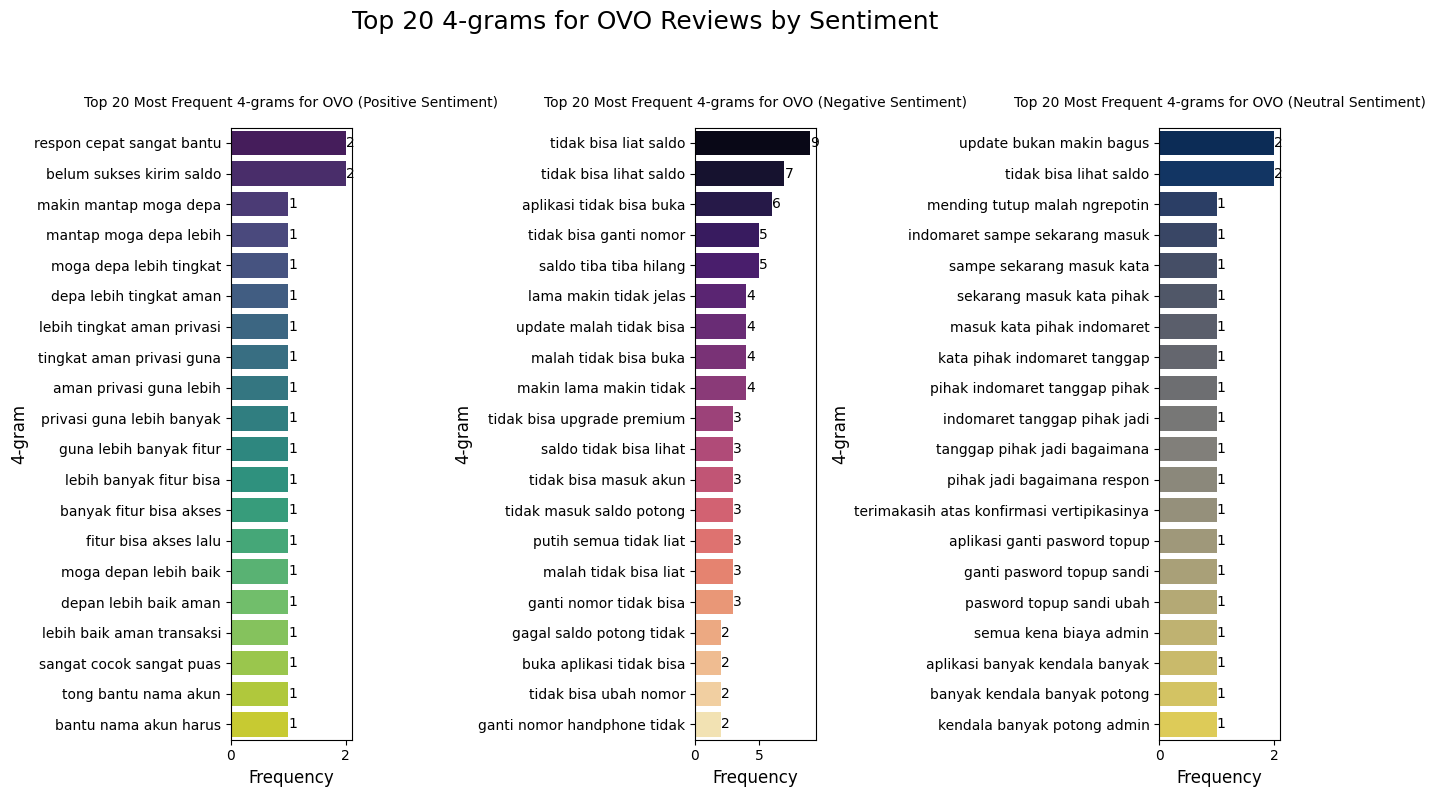

Visualizations of top 20 4-grams for OVO by sentiment have been generated.


In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import itertools

# Ensure get_top_ngrams is defined (it was defined in a previous cell)
# It's good practice to re-define or ensure its availability if the environment resets
def get_top_ngrams(df, ngram_column, n=20):
    all_ngrams = list(itertools.chain.from_iterable(df[ngram_column]))
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(n)

# 1. Filter df_ovo DataFrame by sentiment
df_ovo_positive_sentiment = df_ovo[df_ovo['Sentiment'] == 'Positive']
df_ovo_negative_sentiment = df_ovo[df_ovo['Sentiment'] == 'Negative']
df_ovo_neutral_sentiment = df_ovo[df_ovo['Sentiment'] == 'Neutral']

# 2. Extract top 20 4-grams for each sentiment
top_20_ovo_positive_4_grams = get_top_ngrams(df_ovo_positive_sentiment, 'Review_4_grams', 20)
top_20_ovo_negative_4_grams = get_top_ngrams(df_ovo_negative_sentiment, 'Review_4_grams', 20)
top_20_ovo_neutral_4_grams = get_top_ngrams(df_ovo_neutral_sentiment, 'Review_4_grams', 20)

# 3. Convert each of the top 4-grams lists into pandas DataFrames
df_top_20_ovo_positive_4_grams = pd.DataFrame(top_20_ovo_positive_4_grams, columns=['4-gram', 'Frequency'])
df_top_20_ovo_negative_4_grams = pd.DataFrame(top_20_ovo_negative_4_grams, columns=['4-gram', 'Frequency'])
df_top_20_ovo_neutral_4_grams = pd.DataFrame(top_20_ovo_neutral_4_grams, columns=['4-gram', 'Frequency'])

# 4. Create a single figure with three subplots
plt.figure(figsize=(13, 8))

# 5a. Positive Sentiment Plot
plt.subplot(1, 3, 1)
ax_positive = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_ovo_positive_4_grams, hue='4-gram', legend=False, palette='viridis')
plt.title('Top 20 Most Frequent 4-grams for OVO (Positive Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_positive.patches:
    ax_positive.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 5b. Negative Sentiment Plot
plt.subplot(1, 3, 2)
ax_negative = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_ovo_negative_4_grams, hue='4-gram', legend=False, palette='magma')
plt.title('Top 20 Most Frequent 4-grams for OVO (Negative Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_negative.patches:
    ax_negative.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 5c. Neutral Sentiment Plot
plt.subplot(1, 3, 3)
ax_neutral = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_ovo_neutral_4_grams, hue='4-gram', legend=False, palette='cividis')
plt.title('Top 20 Most Frequent 4-grams for OVO (Neutral Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_neutral.patches:
    ax_neutral.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 6. Add a main title to the entire figure
plt.suptitle('Top 20 4-grams for OVO Reviews by Sentiment', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap

# 7. Display the plot
plt.show()

print("Visualizations of top 20 4-grams for OVO by sentiment have been generated.")

### Extract and Visualize Top 4-grams for GoPay by Sentiment

Filter ulasan GoPay berdasarkan sentimen 'Positive', 'Negative', dan 'Neutral'. Untuk setiap sentimen, ekstrak 20 4-gram yang paling sering muncul dan visualisasikan menggunakan diagram batang dalam satu gambar dengan tiga subplot. Pastikan jumlah frekuensi ditampilkan dan legenda disediakan untuk kejelasan.


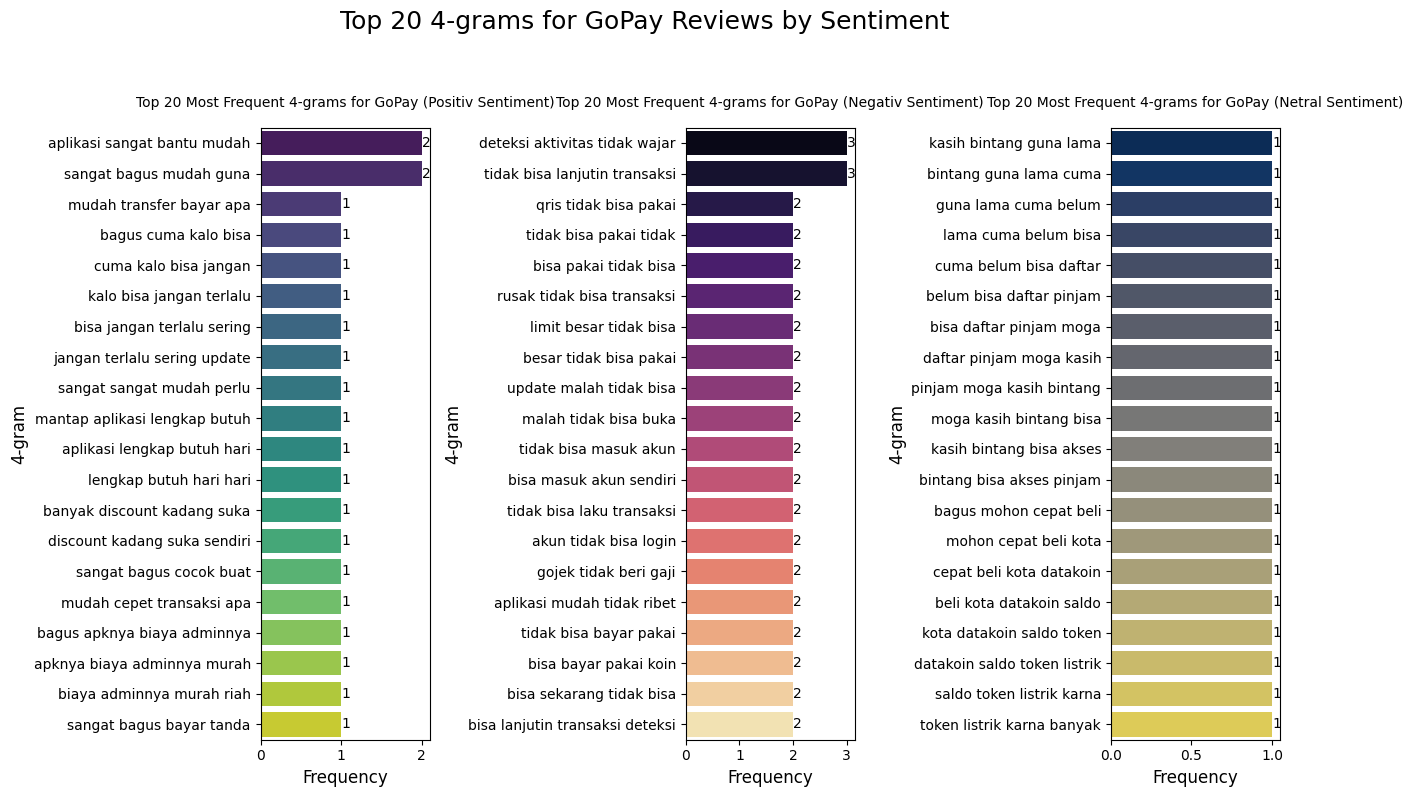

Visualizations of top 20 4-grams for GoPay by sentiment have been generated.


In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import itertools

# Ensure get_top_ngrams is defined (it was defined in a previous cell)
# It's good practice to re-define or ensure its availability if the environment resets
def get_top_ngrams(df, ngram_column, n=20):
    all_ngrams = list(itertools.chain.from_iterable(df[ngram_column]))
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(n)

# 1. Filter df_gopay DataFrame by sentiment
df_gopay_positive_sentiment = df_gopay[df_gopay['Sentiment'] == 'Positive']
df_gopay_negative_sentiment = df_gopay[df_gopay['Sentiment'] == 'Negative']
df_gopay_neutral_sentiment = df_gopay[df_gopay['Sentiment'] == 'Neutral']

# 2. Extract top 20 4-grams for each sentiment
top_20_gopay_positive_4_grams = get_top_ngrams(df_gopay_positive_sentiment, 'Review_4_grams', 20)
top_20_gopay_negative_4_grams = get_top_ngrams(df_gopay_negative_sentiment, 'Review_4_grams', 20)
top_20_gopay_neutral_4_grams = get_top_ngrams(df_gopay_neutral_sentiment, 'Review_4_grams', 20)

# 3. Convert each of the top 4-grams lists into pandas DataFrames
df_top_20_gopay_positive_4_grams = pd.DataFrame(top_20_gopay_positive_4_grams, columns=['4-gram', 'Frequency'])
df_top_20_gopay_negative_4_grams = pd.DataFrame(top_20_gopay_negative_4_grams, columns=['4-gram', 'Frequency'])
df_top_20_gopay_neutral_4_grams = pd.DataFrame(top_20_gopay_neutral_4_grams, columns=['4-gram', 'Frequency'])

# 4. Create a single figure with three subplots
plt.figure(figsize=(13, 8))

# 5a. Positive Sentiment Plot
plt.subplot(1, 3, 1)
ax_positive = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_gopay_positive_4_grams, hue='4-gram', legend=False, palette='viridis')
plt.title('Top 20 Most Frequent 4-grams for GoPay (Positiv Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_positive.patches:
    ax_positive.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 5b. Negative Sentiment Plot
plt.subplot(1, 3, 2)
ax_negative = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_gopay_negative_4_grams, hue='4-gram', legend=False, palette='magma')
plt.title('Top 20 Most Frequent 4-grams for GoPay (Negativ Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_negative.patches:
    ax_negative.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 5c. Neutral Sentiment Plot
plt.subplot(1, 3, 3)
ax_neutral = sns.barplot(x='Frequency', y='4-gram', data=df_top_20_gopay_neutral_4_grams, hue='4-gram', legend=False, palette='cividis')
plt.title('Top 20 Most Frequent 4-grams for GoPay (Netral Sentiment)', fontsize=10,y=1.02)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('4-gram', fontsize=12)
# 5c. Add frequency counts to the end of each bar
for p in ax_neutral.patches:
    ax_neutral.text(p.get_width(), p.get_y() + p.get_height()/2,
                     f'{int(p.get_width())}', ha="left", va="center", fontsize=10, color='black')

# 6. Add a main title to the entire figure
plt.suptitle('Top 20 4-grams for GoPay Reviews by Sentiment', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap

# 7. Display the plot
plt.show()

print("Visualizations of top 20 4-grams for GoPay by sentiment have been generated.")